<a href="https://colab.research.google.com/github/elenasamsonenko/predicting_composite/blob/main/Predicting_composite_SamsonenkoEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая часть ВКР "Прогнозирование конечных свойств новых материалов (композиционных материалов)"

Загружаю данные

In [ ]:
!gdown --id 1HsCdEPaiXrLUo3_zr_3QkJv0iJyxDZx9 #X_nup
!gdown --id 1wNEEYeAPb9WfDvYahQD7RJ0BSvtAXXoN #X_bp

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HsCdEPaiXrLUo3_zr_3QkJv0iJyxDZx9
To: /content/X_nup.xlsx
100% 42.4k/42.4k [00:00<00:00, 34.2MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wNEEYeAPb9WfDvYahQD7RJ0BSvtAXXoN
To: /content/X_bp.xlsx
100% 139k/139k [00:00<00:00, 69.0MB/s]


In [ ]:
#загружаем нужные библиотеки
%matplotlib inline


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras as keras


from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler
import pickle
from joblib import dump, load


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#загружаю датасеты со свойствами композитов
X_nup = pd.read_excel('X_nup.xlsx')
X_bp = pd.read_excel('X_bp.xlsx')

Разведочный анализ данных

In [ ]:
#предварительно просматриваем данные
X_nup

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

In [ ]:
X_bp

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [ ]:
#удаляю первый столбец, он дублирует индексацию
X_nup = X_nup.drop('Unnamed: 0', axis=1)
X_bp = X_bp.drop('Unnamed: 0', axis=1)

In [ ]:
#объединение датасетов по индексу тип объединения INNER
df = X_bp.join(X_nup, how='inner')

In [ ]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [ ]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

В датасете 1023 записи и 13 столбцов.   
Все столбцы имеют тип данных float64, кроме столбца Угол нашивки, который имеет тип данных int64.   
Пропущенных значений в датасете нет.   

In [ ]:
df.shape

(1023, 13)

In [ ]:
#описательная статистика датасета
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Стандартное отклонение показывает степень разброса данных относительно среднего значения. Чем больше стандартное отклонение, тем больше диапазон изменения признака в наборе данных. Например, стандартное отклонение Прочность при растяжении равно 485.6 ГПа, что говорит о том, что прочность растяжении сильно различается для разных образцов материала.

Минимальное и максимальное значение помогают определить наличие выбросов или аномальных значений в данных. 
Для данных по признаку Угол нашивки наблюдается только два варианта значений 0 градусов и 90 градусов.

В данном датасете наблюдается большой разброс по минимальному и максимальному значению в признаках по столбцу "Прочность при растяжении", "Поверхностная плотность", "Модуль упругости". Значения в данных столбцах может значительно меняться в зависимости от других факторов.

Квартили показывают распределение данных. Они помогают определить форму распределения и наличие асимметрии или скошенности в данных. 
Большинсво значений распределены равномерно, это говорит о преобладании нормального распределения в данных.

In [ ]:
#проверяю датасет на пропуски, пропуски в датасете отсутствуют.
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

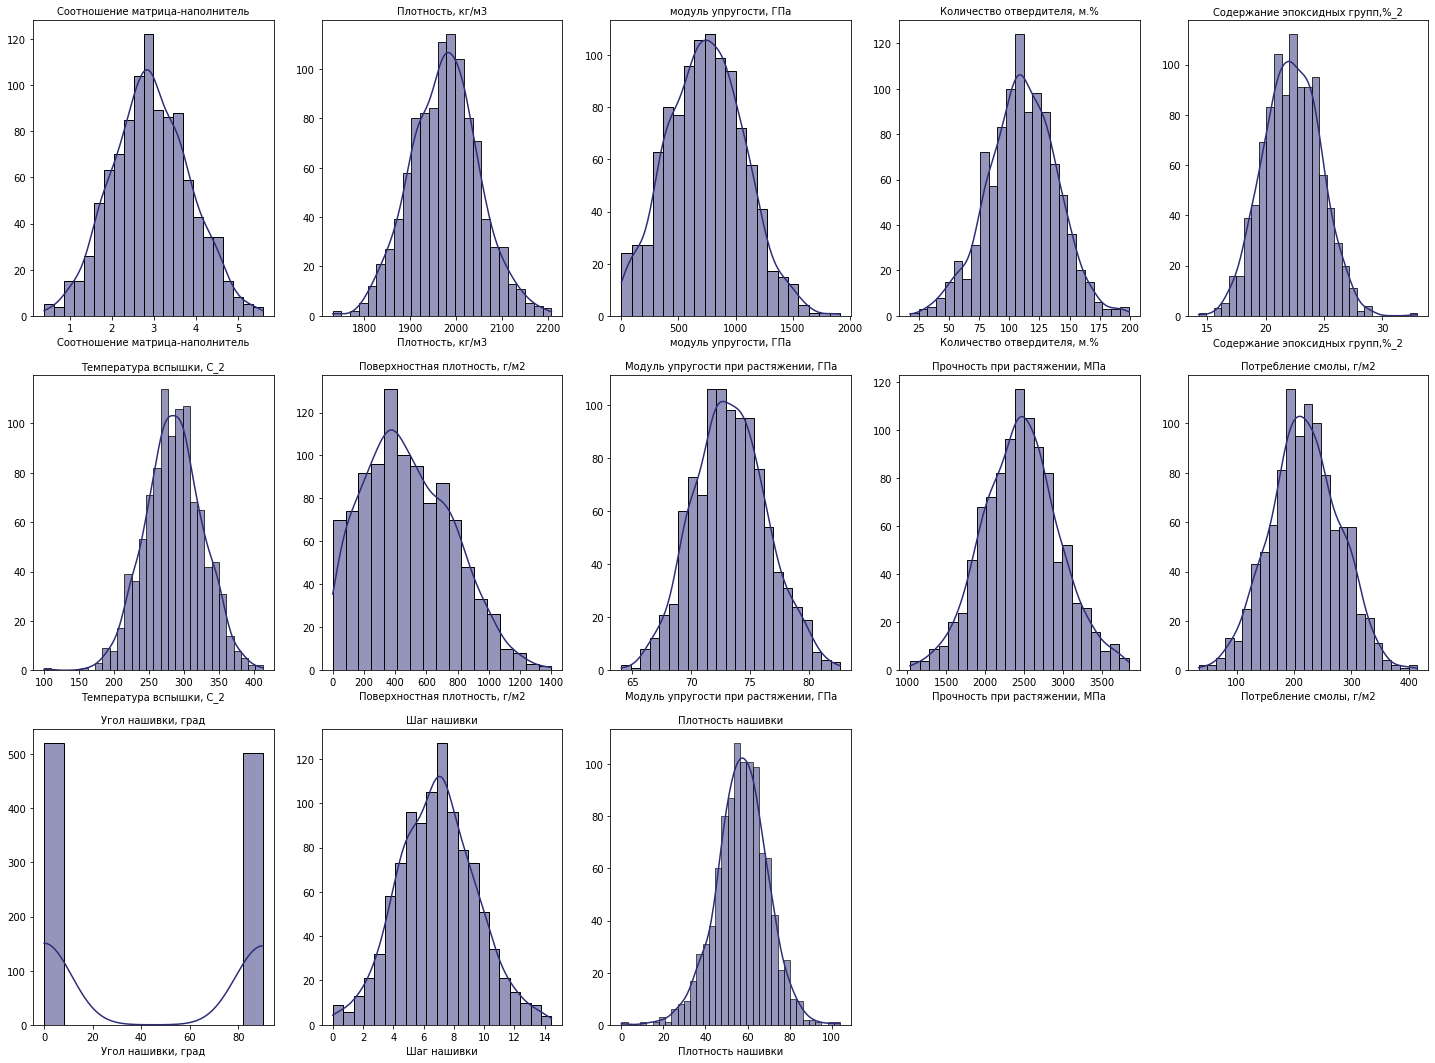

In [ ]:
# Создание сетки графиков
fig, axes = plt.subplots(4, 5, figsize=(25,25))

# Функция для поочередного отображения гистограмм переменных
for ax, col in zip(axes.flat[:len(df.columns)], df.columns):
    sns.histplot(data=df[col], kde=True, color='#7FB9D5', ax=ax)
    ax.set_ylabel(None)
    ax.set_title(col, size=10)

# Скрытие оставшихся пустых графиков
for ax in axes.flat[len(df.columns):]:
    ax.set_visible(False)

plt.show()

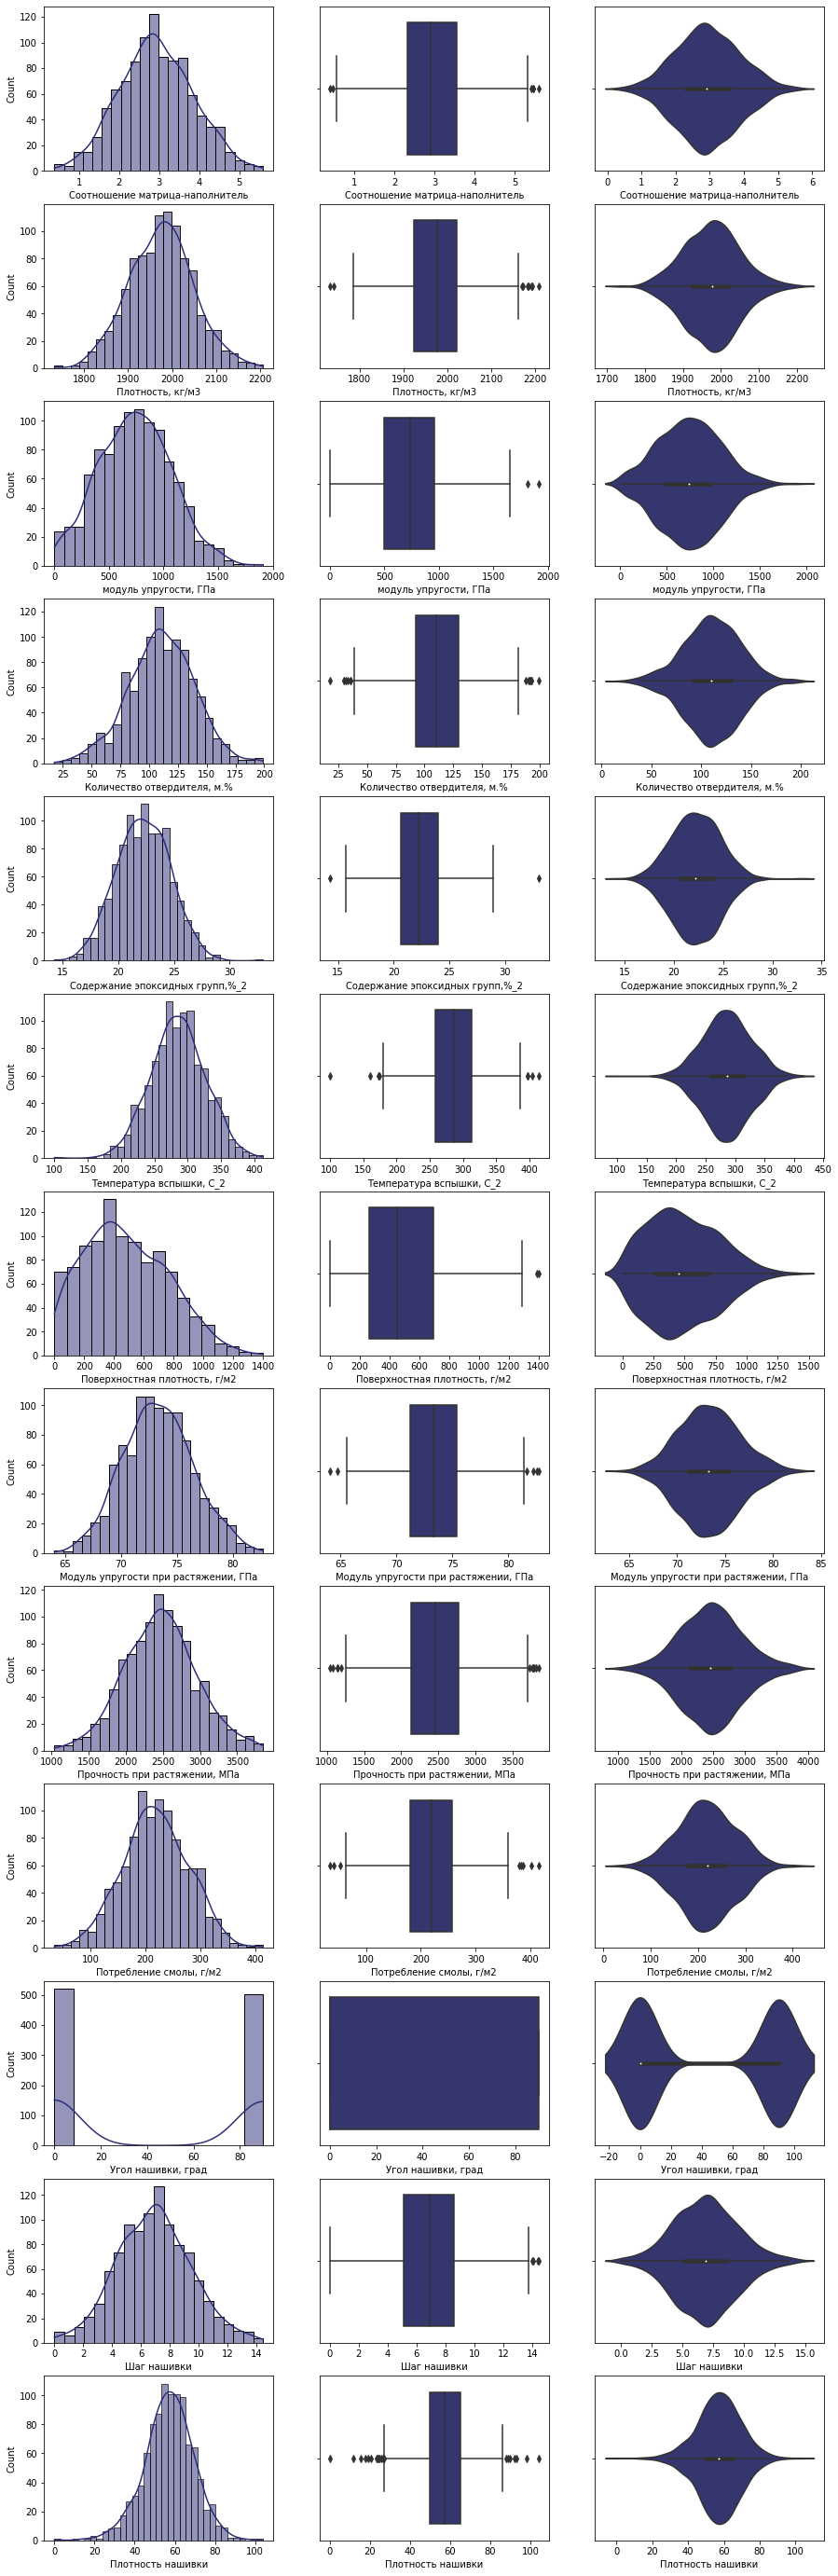

In [ ]:
fig, axes = plt.subplots(13,3, figsize=(15,50))
for i, column in enumerate(df.columns):
  sns.histplot(data=df, x=column, kde=True, ax=axes[i,0], color='#2d2d78')
  sns.boxplot(data=df, x=column, ax=axes[i,1], color='#2d2d78')
  sns.violinplot(data=df, x=column, ax=axes[i,2], color='#2d2d78')
plt.show()


**Данные большинства переменных распределены нормально**.    
Переменная “Поверхностная плотность” имеет правосторонню асимметрию.    
Данные переменной “Угол нашивки” сосредоточены вблизи значений 0 и 90 градусов.

Удалим выбросы с датасета

Соотношение матрица-наполнитель: s=0


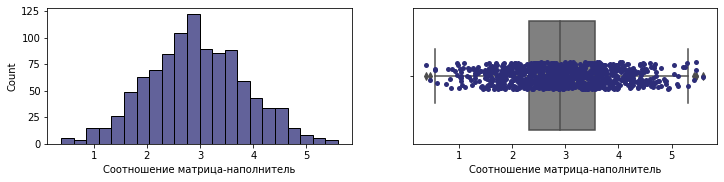

Плотность, кг/м3: s=3


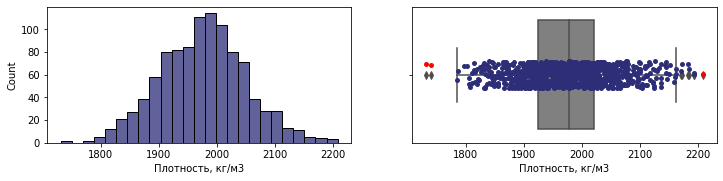

модуль упругости, ГПа: s=2


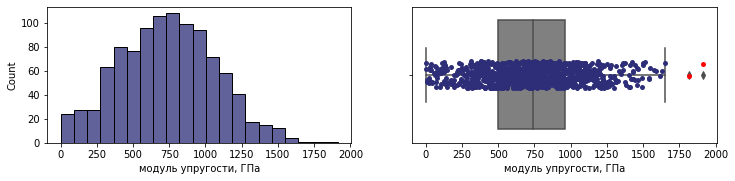

Количество отвердителя, м.%: s=2


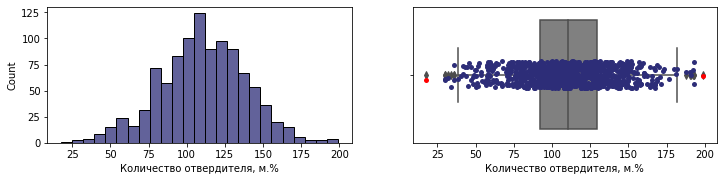

Содержание эпоксидных групп,%_2: s=2


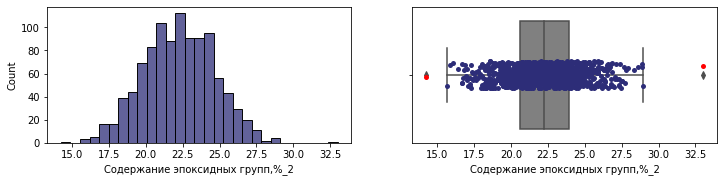

Температура вспышки, С_2: s=3


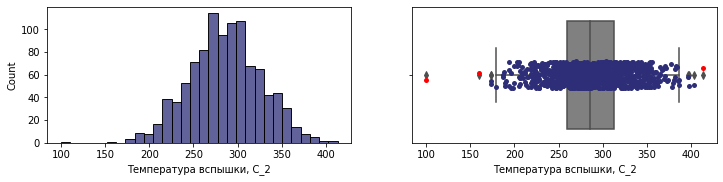

Поверхностная плотность, г/м2: s=2


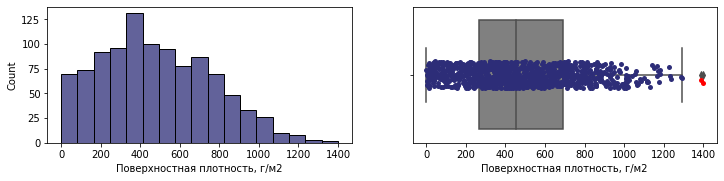

Модуль упругости при растяжении, ГПа: s=0


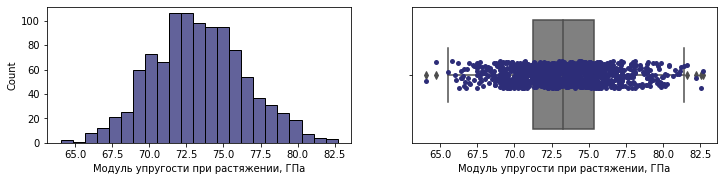

Прочность при растяжении, МПа: s=0


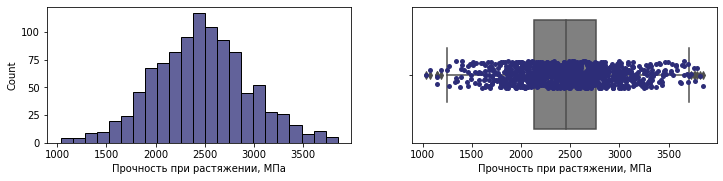

Потребление смолы, г/м2: s=3


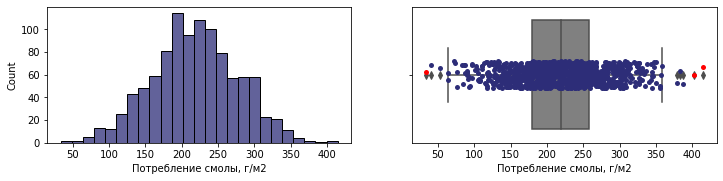

Угол нашивки, град: s=0


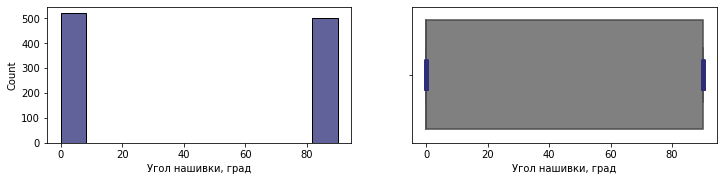

Шаг нашивки: s=0


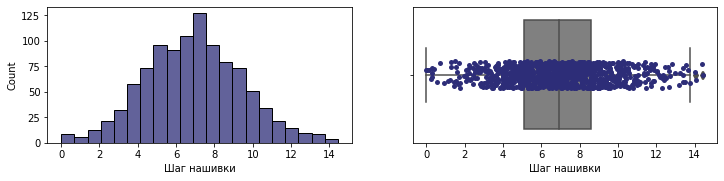

Плотность нашивки: s=7


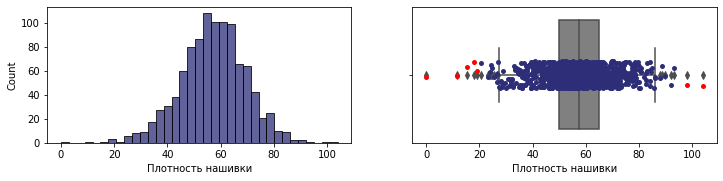

In [ ]:
count = 0
zscore = df.apply(lambda x: (x - x.mean()) / x.std())
d = (zscore.abs() > 3)
count += d.sum().sum()

for column in df:
    print('{}: s={}'.format(column, d[column].sum()))
    fig, axes = plt.subplots(1,2, figsize = (12, 2.5))
    sns.histplot(data=df[[column]], x=column, color='#2d2d78', legend=False, ax=axes[0])
    sns.boxplot(data=df[[column]], x=column, color='grey', ax=axes[1])
    sns.stripplot(data=df[d[column]==False], x=column, color='#2d2d78', ax=axes[1])
    sns.stripplot(data=df[d[column]==True], x=column, color='red', ax=axes[1])
    plt.show()

In [ ]:
#сделаем копию датафрейма, до его преобразования
df_first = df.copy()

Вычислим z-оценки для каждого столбца датафрейма.
z-оценка определяет выбросы как значения, за пределами 3 стандартных отклонений от среднего значения. 
Подсветим выбросы красным цветом диаграмме ящика с усами.   


Z-оценка - это мера того, насколько значение отклоняется от среднего значения в единицах стандартного отклонения. Выбросы часто определяются как значения, которые находятся за пределами определенного количества стандартных отклонений  от среднего значения.

Ссылка на материал
https://ru.wikihow.com/%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B8%D1%82%D1%8C-Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D1%83

**В данных о потреблении смолы и плотности нашивки обнаружено небольшое количество выбросов**

In [ ]:
# Удаляем выбросы
# Определяем выбросы как значения с абсолютной величиной z-оценки больше 3
outliers = pd.DataFrame(index=df.index)

for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)

# Удаляем строки с выбросами из исходного DataFrame
df = df[outliers.sum(axis=1) == 0]

df.shape

(1000, 13)

In [ ]:
#посмотри корреляцию по переменным

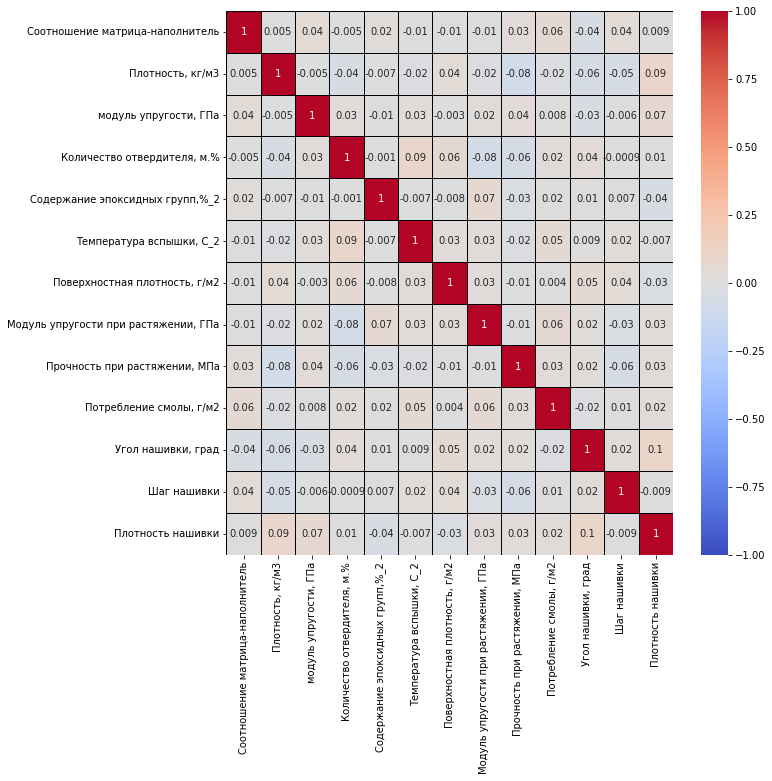

In [ ]:
cor = df.corr()
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(cor, vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='coolwarm', linewidths=1, linecolor='black', ax=axes)
plt.show()

In [ ]:
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1000.0     2.936299    0.908779   
Плотность, кг/м3                      1000.0  1975.402478   72.953703   
модуль упругости, ГПа                 1000.0   738.675486  327.545245   
Количество отвердителя, м.%           1000.0   110.821904   27.869622   
Содержание эпоксидных групп,%_2       1000.0    22.235549    2.384246   
Температура вспышки, С_2              1000.0   285.957299   40.231508   
Поверхностная плотность, г/м2         1000.0   479.855825  277.708571   
Модуль упругости при растяжении, ГПа  1000.0    73.318178    3.113817   
Прочность при растяжении, МПа         1000.0  2464.864198  485.015353   
Потребление смолы, г/м2               1000.0   218.254011   58.944958   
Угол нашивки, град                    1000.0    44.640000   45.021076   
Шаг нашивки                           1000.0     6.910600    2.557748   
Плотность нашивки                     1000.0    57.276293   11.845791   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.319283     2.908811   
Плотность, кг/м3                      1784.482245  1923.628661  1977.321002   
модуль упругости, ГПа                    2.436909   500.772963   741.148111   
Количество отвердителя, м.%             29.956150    92.523816   110.652620   
Содержание эпоксидных групп,%_2         15.695894    20.583191    22.221462   
Температура вспышки, С_2               173.484920   259.103839   285.853960   
Поверхностная плотность, г/м2            0.603740   266.978731   450.869535   
Модуль упругости при растяжении, ГПа    64.054061    71.248823    73.230375   
Прочность при растяжении, МПа         1036.856605  2134.535871  2456.394188   
Потребление смолы, г/м2                 41.048278   179.812213   218.697660   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.037639     5.105814     6.922196   
Плотность нашивки                       20.571633    49.892983    57.471971   

                                              75%          max  
Соотношение матрица-наполнитель          3.553931     5.591742  
Плотность, кг/м3                      2021.159498  2192.738783  
модуль упругости, ГПа                  961.650808  1649.415706  
Количество отвердителя, м.%            129.853101   192.851702  
Содержание эпоксидных групп,%_2         23.974880    28.955094  
Температура вспышки, С_2               313.029126   403.652861  
Поверхностная плотность, г/м2          691.528426  1291.340115  
Модуль упругости при растяжении, ГПа    75.326573    82.682051  
Прочность при растяжении, МПа         2760.163022  3848.436732  
Потребление смолы, г/м2                257.474775   386.903431  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.588839    14.440522  
Плотность нашивки                       64.930896    92.963492

In [ ]:
excp = df.describe().T
excp.to_excel('Стат.xlsx')

Стандартное отклонение показывает степень разброса данных относительно среднего значения. Чем больше стандартное отклонение, тем больше диапазон изменения признака в наборе данных. Например, стандартное отклонение Прочность при растяжении равно 485.6 ГПа, что говорит о том, что прочность растяжении сильно различается для разных образцов материала. 
 
Минимальное и максимальное значение помогают определить наличие выбросов или аномальных значений в данных. Для данных по признаку Угол нашивки наблюдается только два варианта значений 0 градусов и 90 градусов. 
 
В данном датасете наблюдается большой разброс по минимальному и максимальному значению в признаках по столбцу "Прочность при растяжении", "Поверхностная плотность", "Модуль упругости". Значения в данных столбцах может значительно меняться в зависимости от других факторов. 
 
Квартили показывают распределение данных. Они помогают определить форму распределения и наличие асимметрии или скошенности в данных. Большинсво значений распределены равномерно, это говорит о преобладании нормального распределения в данных.

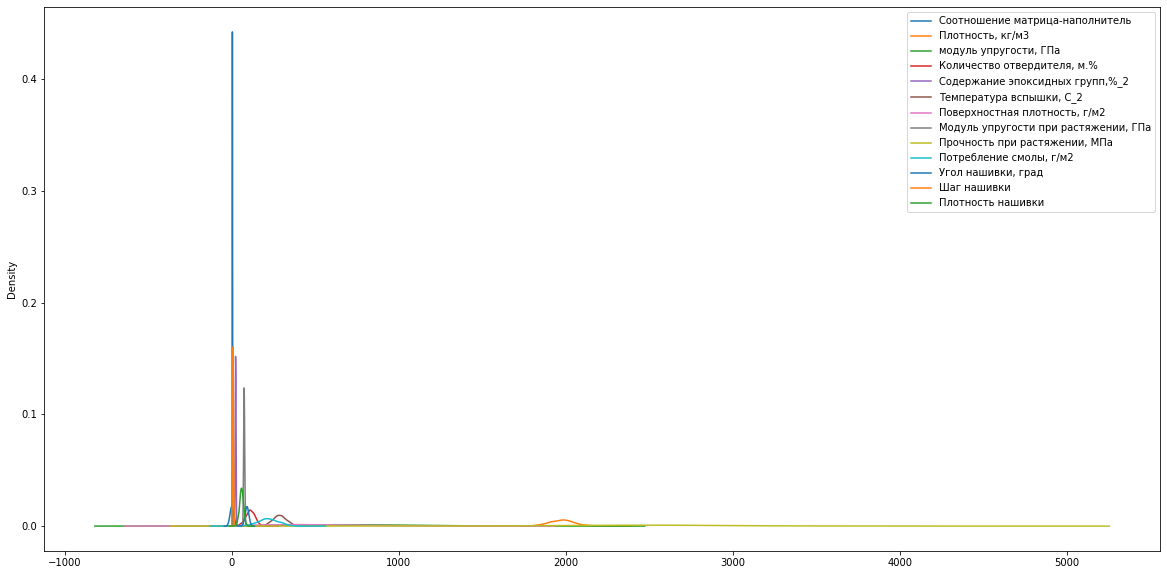

In [ ]:
# оценка плотности едра до нормализации
def plt_kde(df):
  fig, ax = plt.subplots(figsize=(20, 10))
  df.plot(kind='kde', ax=ax)
plt_kde(df)

In [ ]:
# Нормализуем данные с помощью MinMaxScaler
scaler = MinMaxScaler() 

# Нормализация данных в датафрейме df с помощью метода fit_transform и сохранение результата в новый датафрейм df_norm
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)

(0.34, 0.7700000000000002)

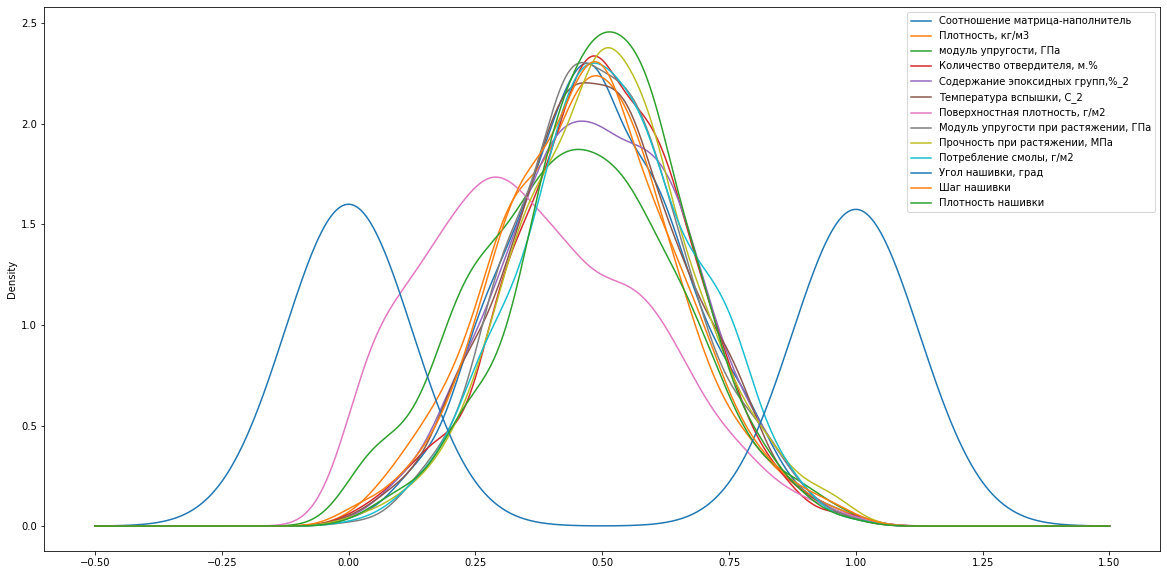

In [ ]:
# оценка плотности едра после нормализации
def plt_kde(df):
  fig, ax = plt.subplots(figsize=(20, 10))
  df.plot(kind='kde', ax=ax)
plt_kde(df)

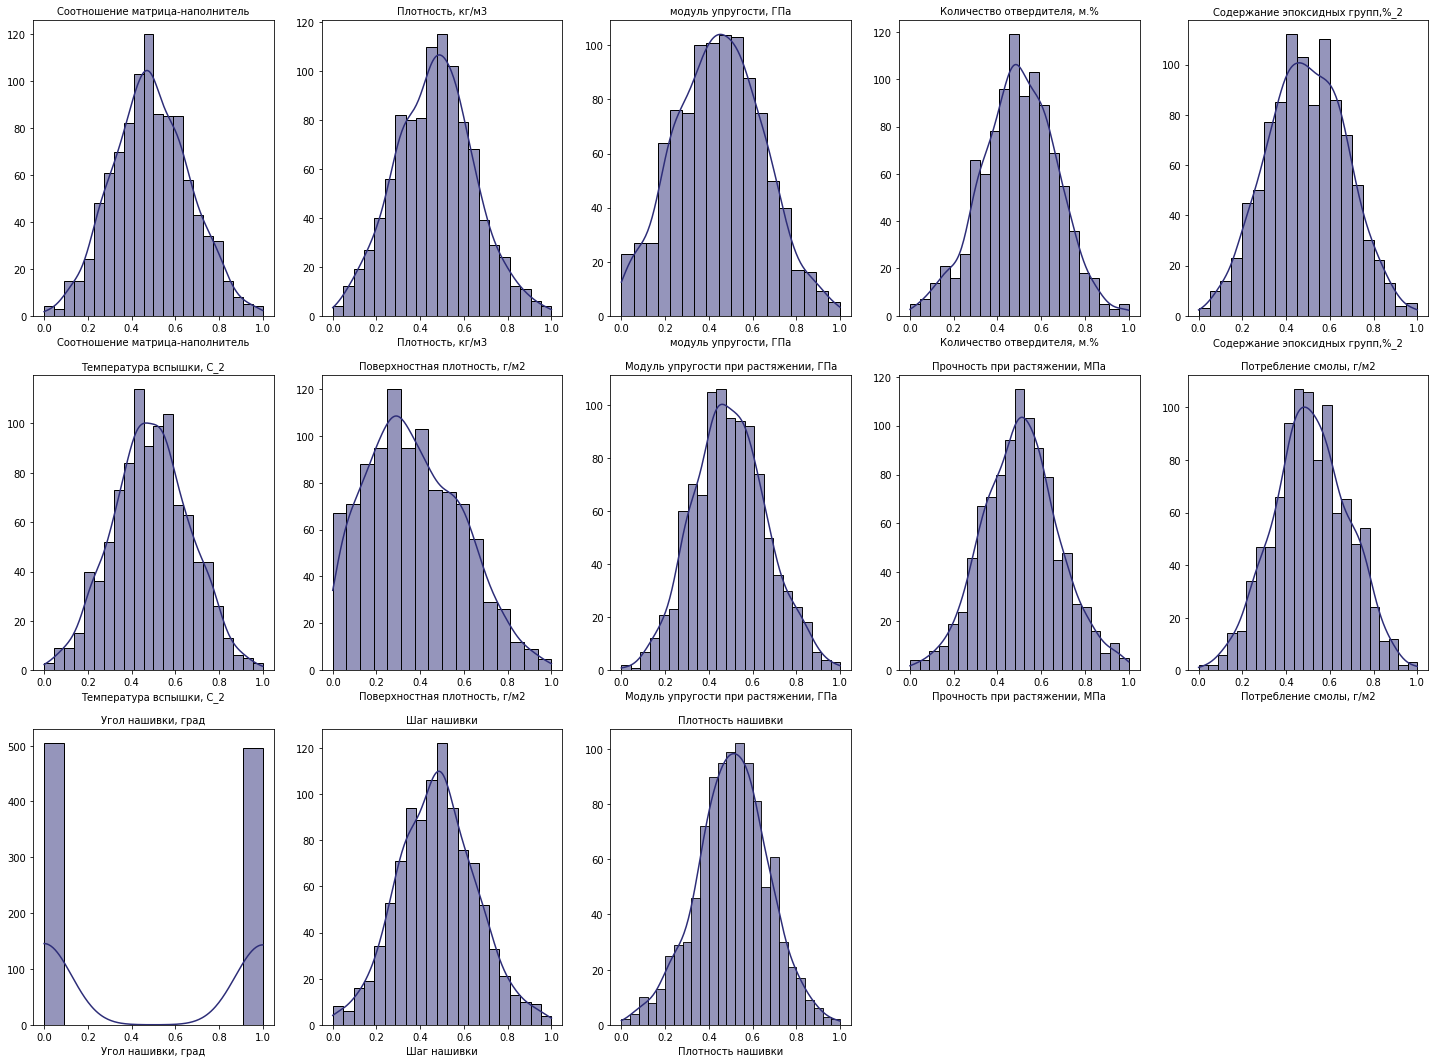

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(25,25))

# Функция для поочередного отображения гистограмм переменных
for ax, col in zip(axes.flat[:len(df.columns)], df.columns):
    sns.histplot(data=df[col], kde=True, color='#2d2d78', ax=ax)
    ax.set_ylabel(None)
    ax.set_title(col, size=10)

# Скрытие оставшихся пустых графиков
for ax in axes.flat[len(df.columns):]:
    ax.set_visible(False)

plt.show()

Соотношение матрица-наполнитель: s=0


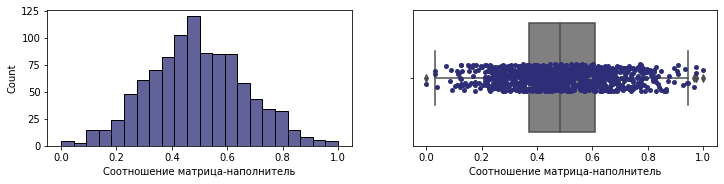

Плотность, кг/м3: s=0


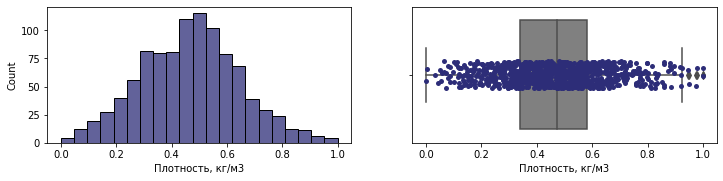

модуль упругости, ГПа: s=0


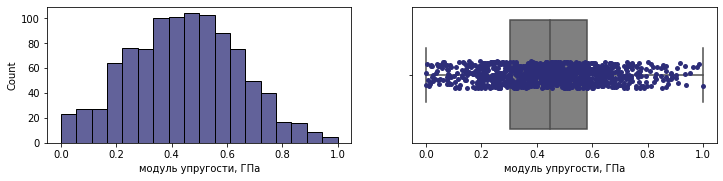

Количество отвердителя, м.%: s=0


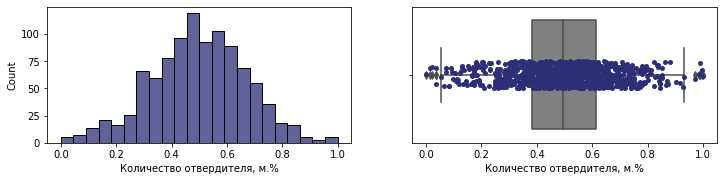

Содержание эпоксидных групп,%_2: s=0


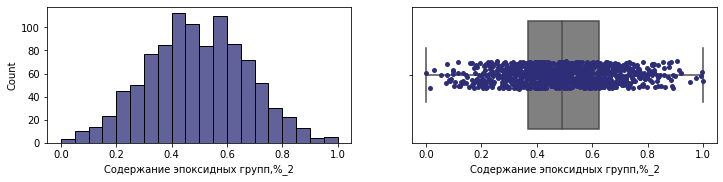

Температура вспышки, С_2: s=0


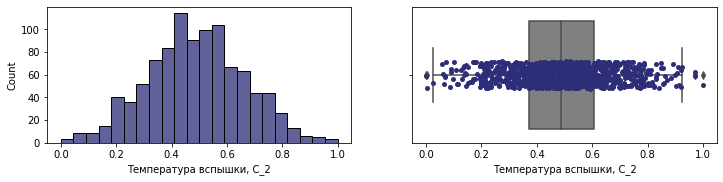

Поверхностная плотность, г/м2: s=0


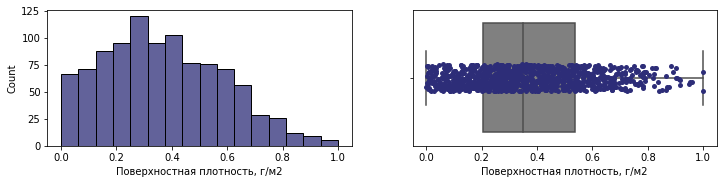

Модуль упругости при растяжении, ГПа: s=1


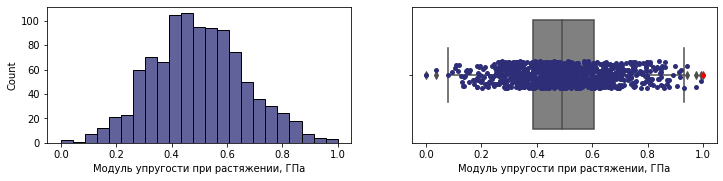

Прочность при растяжении, МПа: s=0


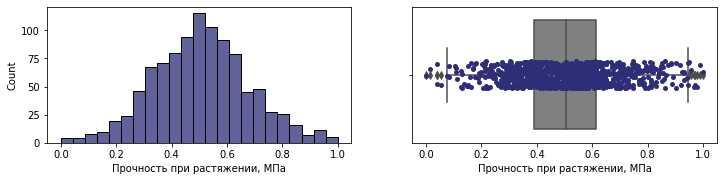

Потребление смолы, г/м2: s=1


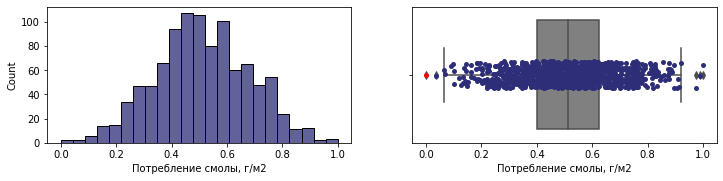

Угол нашивки, град: s=0


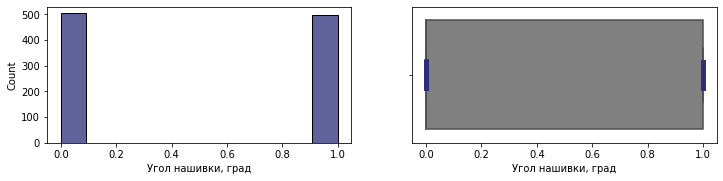

Шаг нашивки: s=0


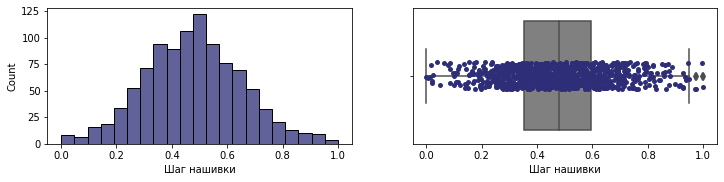

Плотность нашивки: s=2


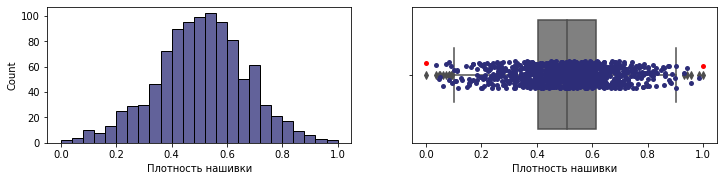

In [ ]:
#отрисуем графики после нормализации
count = 0
zscore = df.apply(lambda x: (x - x.mean()) / x.std())
d = (zscore.abs() > 3)
count += d.sum().sum()

for column in df:
    print('{}: s={}'.format(column, d[column].sum()))
    fig, axes = plt.subplots(1,2, figsize = (12, 2.5))
    sns.histplot(data=df[[column]], x=column, color='#2d2d78', legend=False, ax=axes[0])
    sns.boxplot(data=df[[column]], x=column, color='grey', ax=axes[1])
    sns.stripplot(data=df[d[column]==False], x=column, color='#2d2d78', ax=axes[1])
    sns.stripplot(data=df[d[column]==True], x=column, color='red', ax=axes[1])
    plt.show()

In [ ]:
#после нормализации у всех переменных тип данных float64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   float64
 11  Шаг нашивки      

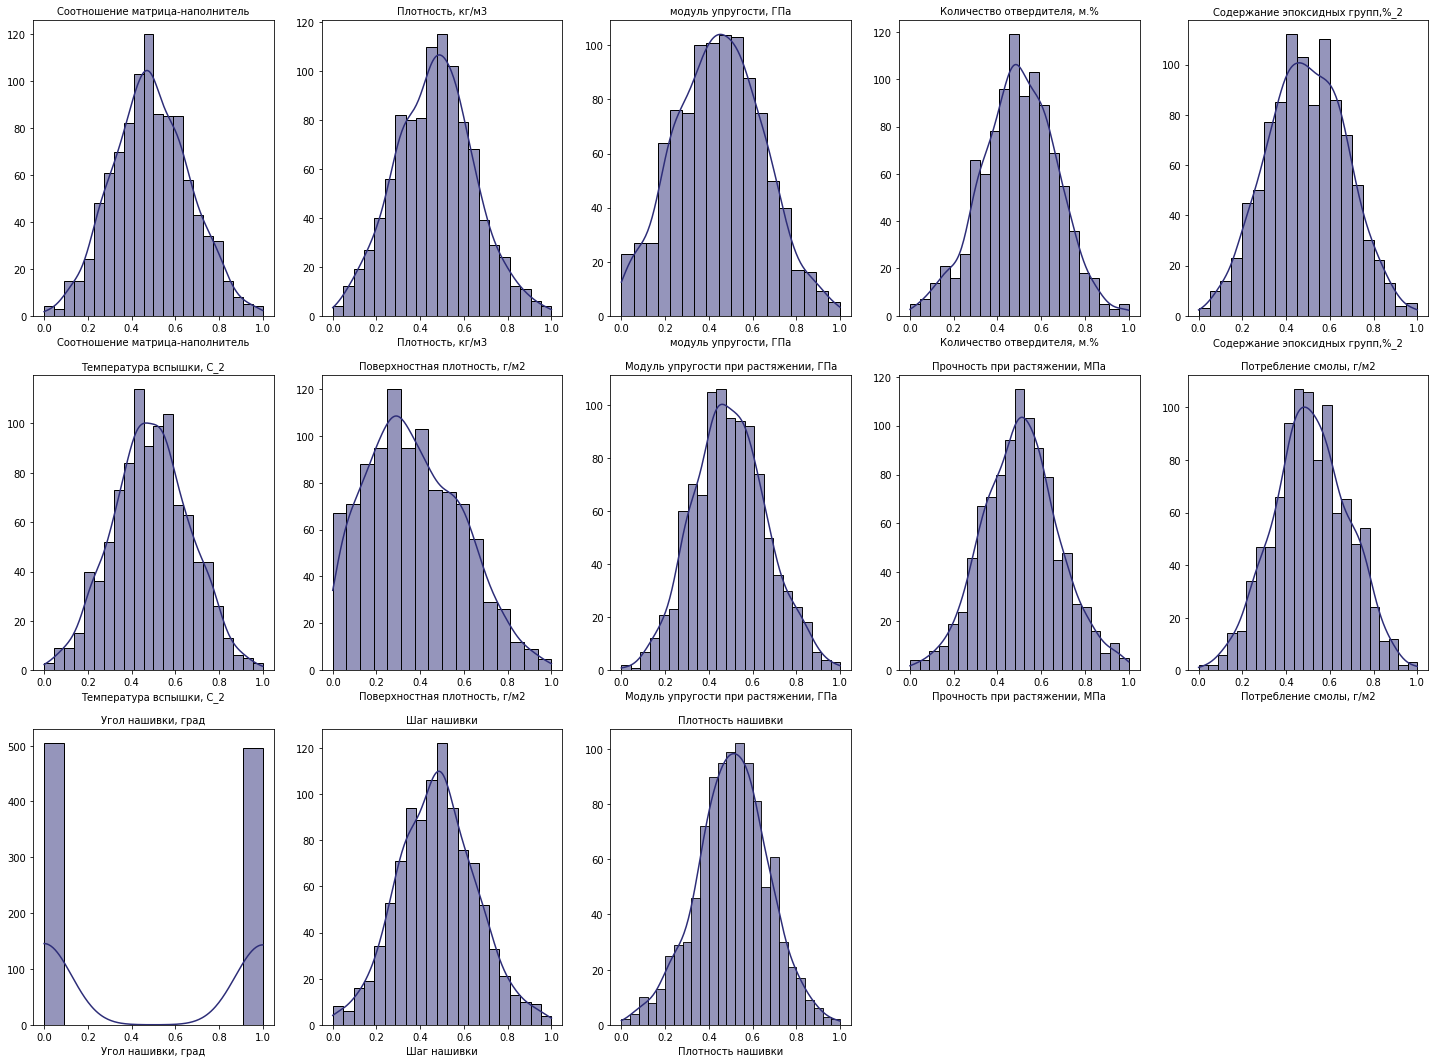

In [ ]:
# Порсмотрим распределение после нормализации данных
fig, axes = plt.subplots(4, 5, figsize=(25,25))

# Функция для поочередного отображения гистограмм переменных
for ax, col in zip(axes.flat[:len(df.columns)], df.columns):
    sns.histplot(data=df[col], kde=True, color='#2d2d78', ax=ax)
    ax.set_ylabel(None)
    ax.set_title(col, size=10)

# Скрытие оставшихся пустых графиков
for ax in axes.flat[len(df.columns):]:
    ax.set_visible(False)

In [ ]:
df.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       1000.0  0.489568  0.174687  0.0   
Плотность, кг/м3                      1000.0  0.467648  0.178696  0.0   
модуль упругости, ГПа                 1000.0  0.447024  0.198876  0.0   
Количество отвердителя, м.%           1000.0  0.496427  0.171089  0.0   
Содержание эпоксидных групп,%_2       1000.0  0.493216  0.179818  0.0   
Температура вспышки, С_2              1000.0  0.488654  0.174792  0.0   
Поверхностная плотность, г/м2         1000.0  0.371301  0.215155  0.0   
Модуль упругости при растяжении, ГПа  1000.0  0.497322  0.167158  0.0   
Прочность при растяжении, МПа         1000.0  0.507902  0.172506  0.0   
Потребление смолы, г/м2               1000.0  0.512370  0.170432  0.0   
Угол нашивки, град                    1000.0  0.496000  0.500234  0.0   
Шаг нашивки                           1000.0  0.477193  0.177586  0.0   
Плотность нашивки                     1000.0  0.507027  0.163634  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.370964  0.484284  0.608289  1.0  
Плотность, кг/м3                      0.340831  0.472347  0.579727  1.0  
модуль упругости, ГПа                 0.302576  0.448525  0.582408  1.0  
Количество отвердителя, м.%           0.384097  0.495388  0.613258  1.0  
Содержание эпоксидных групп,%_2       0.368597  0.492154  0.624396  1.0  
Температура вспышки, С_2              0.371985  0.488205  0.606271  1.0  
Поверхностная плотность, г/м2         0.206374  0.348844  0.535295  1.0  
Модуль упругости при растяжении, ГПа  0.386234  0.492609  0.605138  1.0  
Прочность при растяжении, МПа         0.390414  0.504890  0.612932  1.0  
Потребление смолы, г/м2               0.401220  0.513653  0.625772  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.351886  0.477999  0.593714  1.0  
Плотность нашивки                     0.405037  0.509730  0.612766  1.0

In [ ]:
after = df.describe().T
after.to_excel('После норм.xlsx')

Нормализация данных - это способ организации данных. Она используется для упрощения работы с данными и сокращения избыточности информации. 

После нормализации данных среднее значение признаков стало от 0 до 1 и стандартное отклонение около 1. Это позволяет легче сравнивать разные признаки между собой и анализировать их влияние на результат.

Когда данные не нормализованы, признаки имеют разный масштаб и их сложнее сравнивать их между собой.

https://practicum.yandex.ru/blog/chto-takoe-normalizaciya-dannyh/

Разбиваем данные на обучающую и тестовую выборку. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 

In [ ]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

**Модуль упругости при растяжении**

In [ ]:
#cоздаем список названий признаков для входных данных X для програзирования соотношения Модуль упругости при растяжении
X_elasticity = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']

#cоздаем список названий признаков для выходных данных y
y_elasticity = ['Модуль упругости при растяжении, ГПа']

#извлекаем данные из датафрейма df по заданным признакам
X1 = df.loc[:, X_elasticity]
y1 = df.loc[:, y_elasticity]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)


#преобразование в массив NumPy
y1_train1 = y1_train.copy()
y1_test1 = y1_test.copy()
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has bee

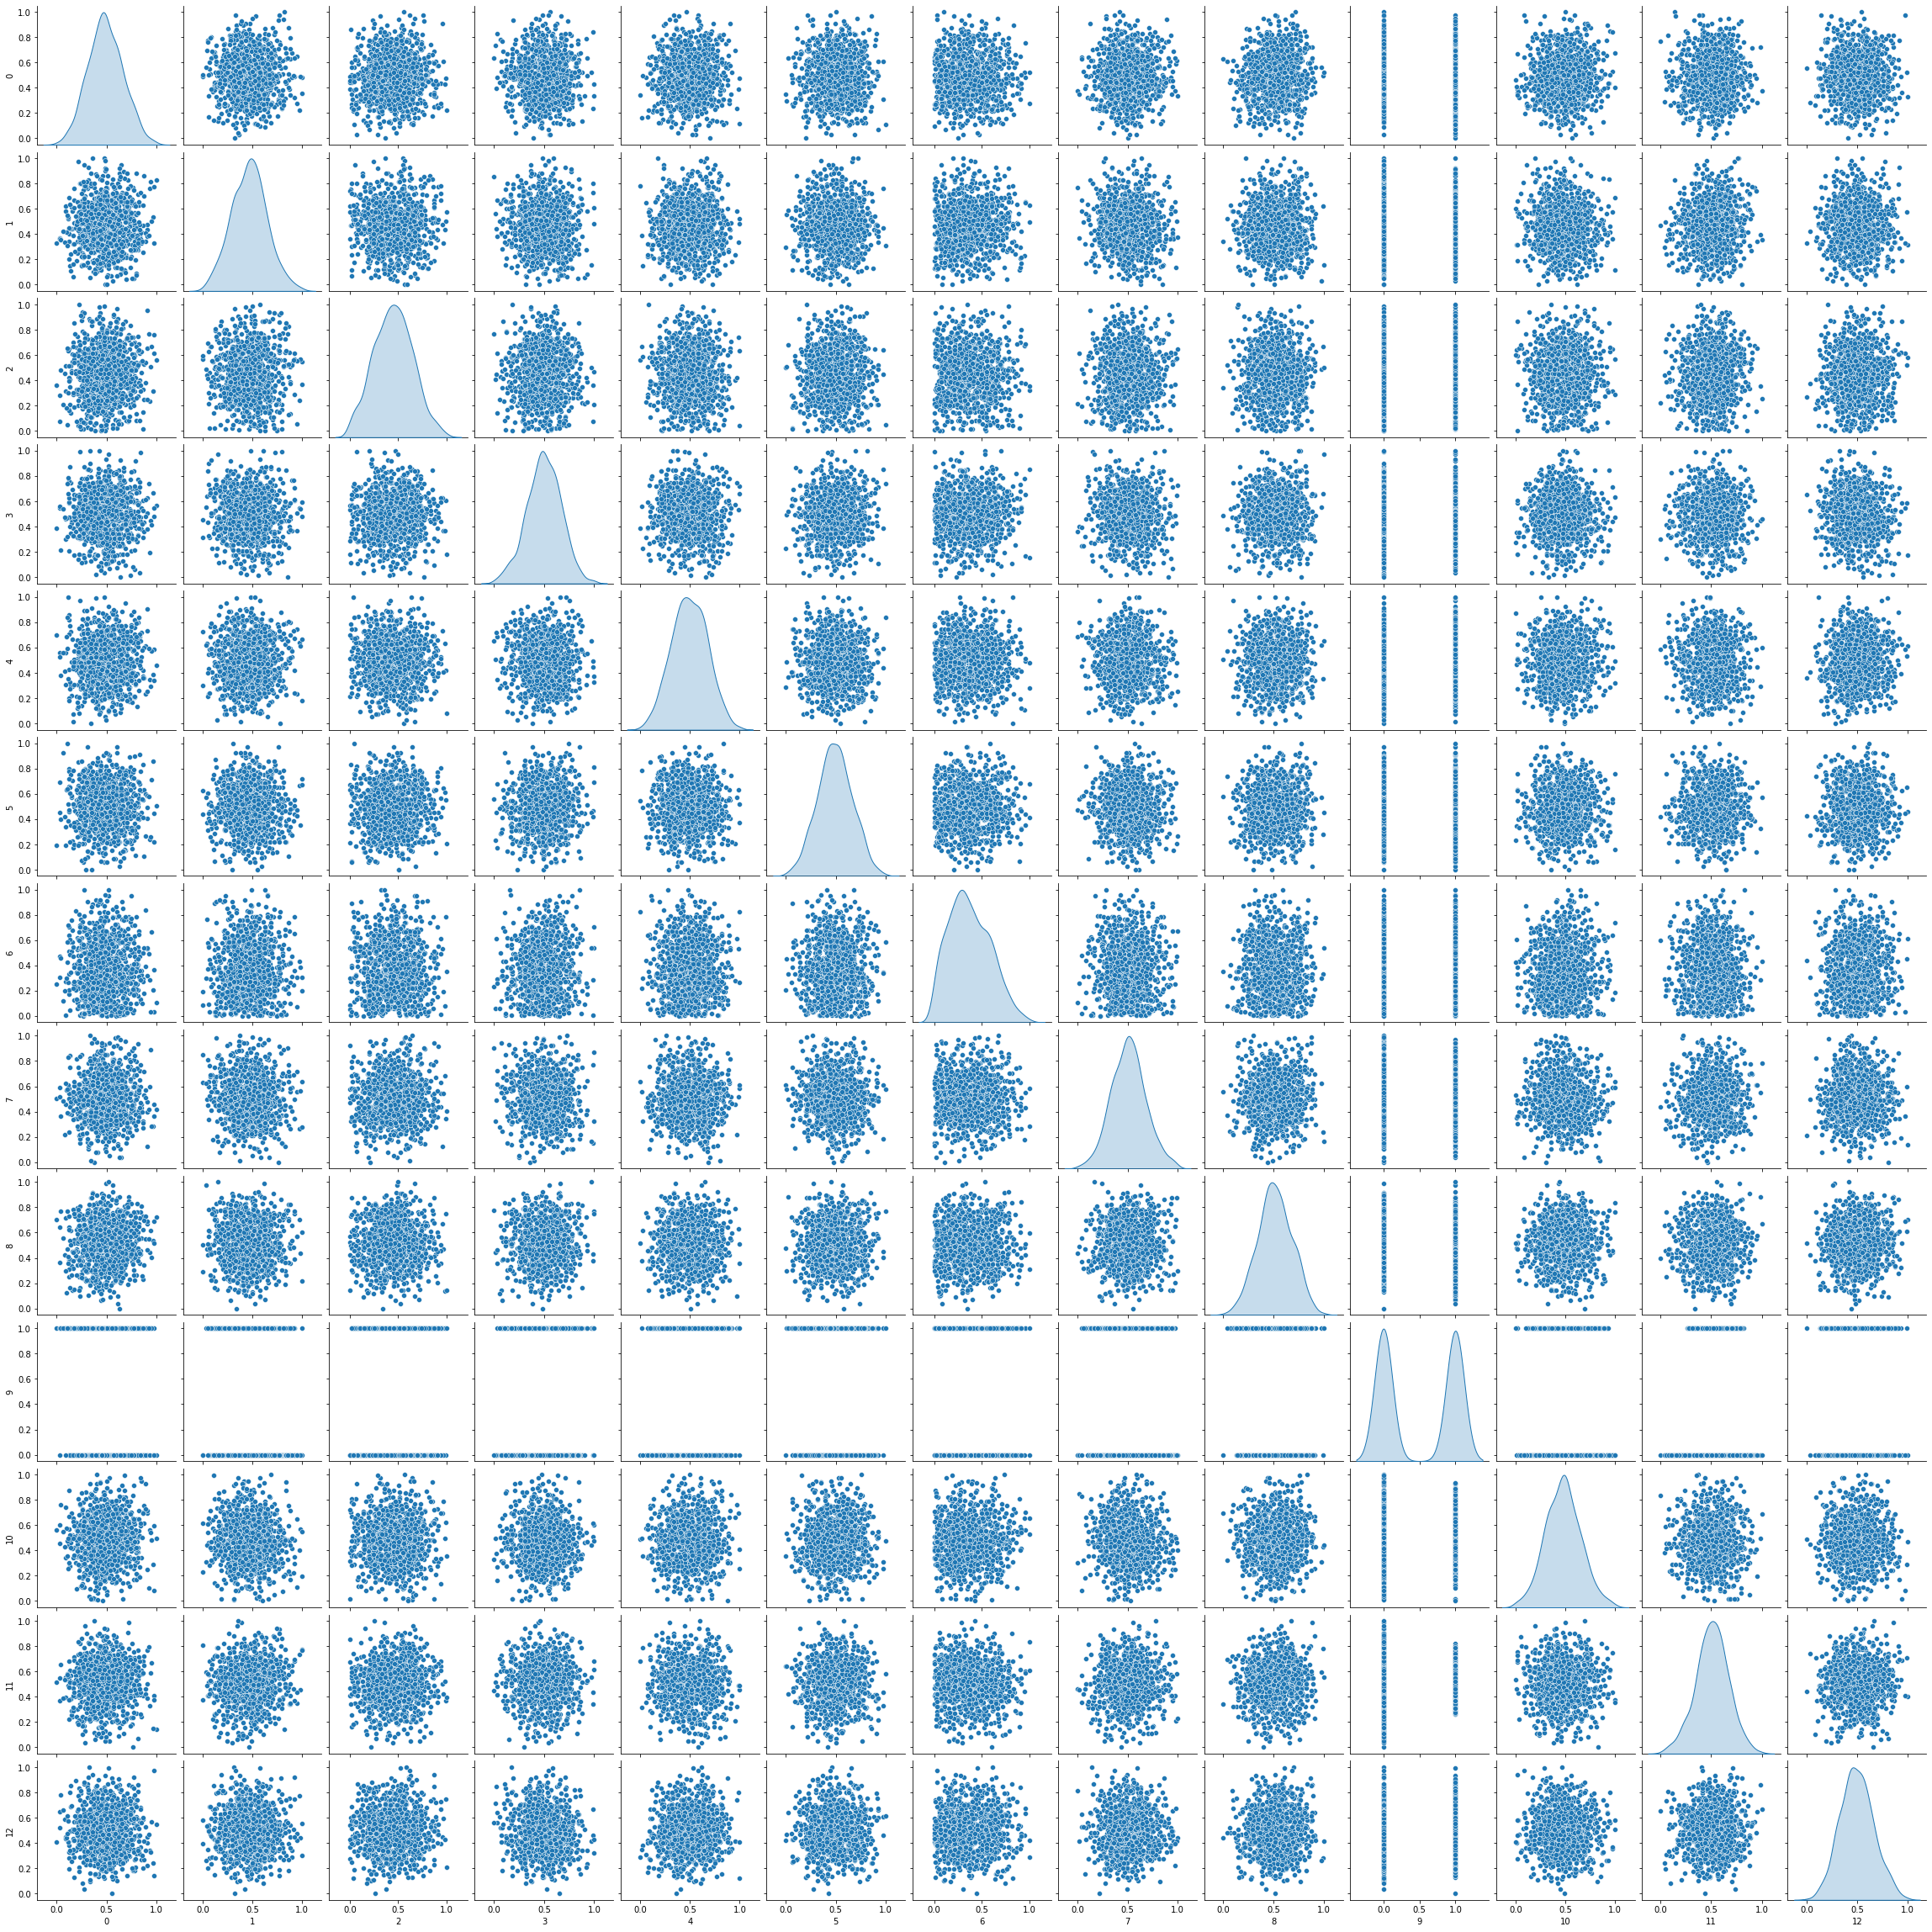

In [88]:
#/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
sns.pairplot(pd.DataFrame(np.column_stack([X1, y1])), diag_kind='kde')


**Прочность при растяжении**

In [ ]:
#повторяем те же шаги для соотношения Прочность при растяжении
X_strength = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']

y_strength = ['Прочность при растяжении, МПа']

X2 = df.loc[:, X_strength]
y2 = df.loc[:, y_strength]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

#преобразование в массив NumPy
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

**Соотношение матрица-наполнитель**

In [ ]:
#повторяем те же шаги для соотношения Соотношение матрица-наполнитель
X_filler = ['Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']

y_filler = ['Соотношение матрица-наполнитель']

X3 = df.loc[:, X_filler]
y3 = df.loc[:, y_filler]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1)

#преобразование в массив NumPy

y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

**Создадим несколько функций**

Создадим функцию, которая будет принимает на вход набор моделей и данные. Таким образом можно протестировать каждую модель с помощью оценки модели машинного обучения (кросс-валидации) и вывести метрики качества для каждой модели.

Метрики:    
**R2** - это коэффициент детерминации. Он показывает, как хорошо модель объясняет 
изменчивость данных. Значения R2 лежат в диапазоне от 0 до 1. Чем ближе значение R2 к 1, тем лучше модель.

**RMSE** (корень из среднеквадратичной ошибки) - это мера разницы между фактическими и предсказанными значениями. Чем меньше значение RMSE, тем лучше модель.

**MAE** (средняя абсолютная ошибка) - это среднее абсолютное значение разницы между фактическими и предсказанными значениями. Чем меньше значение MAE, тем лучше модель.

**Максимальная ошибка** - это наибольшая разница между фактическим и предсказанным значениями. Чем меньше значение максимальной ошибки, тем лучше модель

In [ ]:
# Создаем функцию для оценки моделей на кросс-валидации
def models_on(models, X, y):  
    metric = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    scoring = ['r2', 
               'neg_root_mean_squared_error',
               'neg_mean_absolute_error',
               'max_error']
    for model_name, model in models.items():
        scores = cross_validate(model, X, y , cv=cv, scoring=scoring)
        metric.loc[model_name,'R2'] = scores['test_r2'].mean()
        metric.loc[model_name,'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        metric.loc[model_name,'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        metric.loc[model_name,'max_error'] = scores['test_max_error'].mean()
    return metric

Создадим функцию, которая будет искать оптимальные гиперпараметры модели путем перебора всех возможных комбинаций параметров и оценки качества модели на кросс-валидации

Создаем функцию для поиска оптимальных гиперпараметров модели на кросс-валидации


In [ ]:
def grid_search(model, params, X, y):
    pd.options.display.max_colwidth = 100
    metric = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(X,y)
    metric.loc[:, 'params'] = searcher.cv_results_['params']
    #средняя абсолютнуа ошибка (Mean Absolute Error)
    metric.loc[:, 'MAE'] = -searcher.cv_results_['mean_test_score']
    #ранг каждого набора параметров
    metric.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return metric, searcher.best_estimator_

Создадим функцию вычисления метрики качества модели машинного обучения. На вход модель будет принимать фактические значения y и предсказанные значения y_pred. 

In [ ]:
#определим функцию для получения метрик
def calculate_metrics(model_name, y, y_pred):
    metric = pd.DataFrame()
    metric.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    metric.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * (-1)
    metric.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * (-1)
    metric.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * (-1)
    return metric



Для определения минимального уровня качества рабочей модели машинного обучения будет использоваться `DummyRegressor`, который предсказывает среднее значение обучающей выборки. Этот метод используется как простая база для сравнения с другими регрессорами. Если другие регрессоры показывают качество ниже, чем `DummyRegressor`, то их можно считать неработоспособными.


**1. Модель для прогнозирования модуля упругости при растяжении**

In [91]:
#выводим результативность моделей с гиперпараметрами по умолчанию
default_models1 = {'LinearRegression': LinearRegression(),
                   'GradientBoostingRegressor': GradientBoostingRegressor (random_state=42),
                   'DummyRegressor': DummyRegressor(strategy='mean'),
                   'Lasso': Lasso(),
                   'SVR': SVR(),
                   'KneighborsRegressor': KNeighborsRegressor(),
                   'DecisionTreeRegressor': DecisionTreeRegressor (random_state=42),
                   'RandomForestRegressor': RandomForestRegressor (random_state=42)}
metric1 = models_on(default_models1, X1_train, y1_train)
metric1 = metric1.sort_values(by="R2", ascending=False)

def highlight_max_row(row):
    return ['background-color: #7FB9D5' if row['R2'] == metric1['R2'].max() else '' for _ in row]
metric1.style.apply(highlight_max_row, axis=1)


Ни одна из моделей не показала хороших результатов по коэффициенту детерминации R2, который показывает насколько хорошо модель может объяснить изменения в данных. Если R2 близок к 1, то модель хорошо объясняет данные. Если R2 близок к 0, то модель плохо объясняет данные. А если модели имеют отрицательные значения R2, что означает, что они хуже среднего значения по выборке. 

Лучшая модель по этой метрике - DummyRegressor, которая просто предсказывает среднее значение по выборке.

По метрикам RMSE и MAE, которые измеряют среднюю ошибку предсказаний относительно истинных значений, лучшей моделью также является DummyRegressor.

В целом можно сделать вывод, что все модели показали плохие результаты на кросс-валидации


**Поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой**

Поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой позволяет выбрать наилучшие значения гиперпараметров для модели.

В поиске по сетке определяется набор возможных значений для каждого гиперпараметра и затем модель обучается со всеми возможными комбинациями этих значений.    
Для каждой комбинации используется перекрестная проверка, чтобы оценить качество модели. При перекрестной проверке данные разбиваются на 10 блоков (или “складок”), и модель обучается на 9 из них, а затем тестируется на оставшемся блоке. Этот процесс повторяется 10 раз, так что каждый блок используется для тестирования один раз. Затем результаты усредняются для всех 10 разбиений и так получается оценка качества модели для данной комбинации гиперпараметров.



In [125]:
#1 поиск гиперпараметров для DummyRegressor
best_models1={}
params1 = [
    {'strategy': ['mean', 'median', 'quantile', 'constant'],
     'quantile': [0.25, 0.5, 0.75],
     'constant': [0]}
]

# Выполняем решетчатый поиск на модели DummyRegressor
search, bestmodel = grid_search(DummyRegressor(), params1,X1_train, y1_train)

# Сохраняем лучшую модель в словарь
best_models1[str(bestmodel)] = bestmodel

# Выводим результаты поиска для лучшей модели
search[search['rank']==1]

params       MAE  rank
0  {'constant': 0, 'quantile': 0.25, 'strategy': 'mean'}  0.135033     1
4   {'constant': 0, 'quantile': 0.5, 'strategy': 'mean'}  0.135033     1
8  {'constant': 0, 'quantile': 0.75, 'strategy': 'mean'}  0.135033     1

In [126]:
#2 поиск гиперпараметров для Lasso
params1 = [
    {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.2, 0.5, 1, 10]}
]
search, bestmodel = grid_search(Lasso(), params1,X1_train, y1_train)
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params       MAE  rank
2  {'alpha': 0.005}  0.135033     1
3   {'alpha': 0.01}  0.135033     1
4    {'alpha': 0.2}  0.135033     1
5    {'alpha': 0.5}  0.135033     1
6      {'alpha': 1}  0.135033     1
7     {'alpha': 10}  0.135033     1

In [127]:
#3 поиск гиперпараметров для LinearRegression

params1 = { 'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [-1, 1, 2] }


search, bestmodel = grid_search(LinearRegression(), params1,X1_train, y1_train)  
best_models1[str(bestmodel)] = bestmodel
search[search['rank']==1]

params       MAE  rank
0   {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}  0.136134     1
1    {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}  0.136134     1
2    {'copy_X': True, 'fit_intercept': True, 'n_jobs': 2}  0.136134     1
6  {'copy_X': False, 'fit_intercept': True, 'n_jobs': -1}  0.136134     1
7   {'copy_X': False, 'fit_intercept': True, 'n_jobs': 1}  0.136134     1
8   {'copy_X': False, 'fit_intercept': True, 'n_jobs': 2}  0.136134     1

In [128]:
#4  поиск гиперпараметров для RandomForestRegressor
params1 = {'n_estimators': range(10, 200, 10), 'max_depth': range(1, 20)}
search, bestmodel1 = grid_search(RandomForestRegressor(), params1,X1_train, y1_train)
best_models1[str(bestmodel1)] = bestmodel1
search[search['rank']==1]



#bestmodel = {'max_depth': 1, 'n_estimators': 10}	

params      MAE  rank
13  {'max_depth': 1, 'n_estimators': 140}  0.13544     1

In [129]:
#5 поиск гиперпараметров для GBR
params1 = {'random_state': [42],
           'loss': ['squares_error', 'absolute_error'],
           'n_estimators': [10,50,75,100],
           'max_depth': [1,2,3],
           'min_samples_split': [2,5,10],
           'learning_rate': [0.01, 0.1, 0.9]
           }
search, bestmodel2 = grid_search(GradientBoostingRegressor(), params1,X1_train, y1_train)
best_models1[str(bestmodel2)] = bestmodel2
search[search['rank']==1]



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_p

params  \
36  {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 1, 'min_samples_split': 2, 'n_est...   
40  {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 1, 'min_samples_split': 5, 'n_est...   
44  {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 1, 'min_samples_split': 10, 'n_es...   

         MAE  rank  
36  0.135147     1  
40  0.135147     1  
44  0.135147     1

In [130]:
#6  поиск гиперпараметров для KneighborsRegressor
params1 = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
search, bestmodel3 = grid_search(KNeighborsRegressor(), params1,X1_train, y1_train)
best_models1[str(bestmodel3)] = bestmodel3
search[search['rank']==1]


params  \
114        {'algorithm': 'auto', 'n_neighbors': 115, 'weights': 'uniform'}   
414   {'algorithm': 'ball_tree', 'n_neighbors': 115, 'weights': 'uniform'}   
714     {'algorithm': 'kd_tree', 'n_neighbors': 115, 'weights': 'uniform'}   
1014      {'algorithm': 'brute', 'n_neighbors': 115, 'weights': 'uniform'}   

           MAE  rank  
114   0.134481     1  
414   0.134481     1  
714   0.134481     1  
1014  0.134481     1

In [131]:
#7 поиск гиперпараметров для SVR
params1 = [
    {'kernel': ['linear'],
     'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.1]
     },
     {'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02, 0.05, 0.1],
      'degree' : [1,5]
      },
      {'kernel':['rbf'],
       'C': [0.001, 0.02, 0.03, 0.04, 0.5]
       },
       {'kernel':['sigmoid'],
        'C': [0.001, 0.01, 0.02, 0.03, 0.04, 0.5]
        }
]
search, bestmodel4 = grid_search(SVR(), params1,X1_train, y1_train)
best_models1[str(bestmodel4)] = bestmodel4
search[search['rank']==1]

params       MAE  rank
18  {'C': 0.02, 'kernel': 'rbf'}  0.134957     1

In [132]:
#8 поиск гиперпараметров для DecisionTreeRegressor
params1 = {'max_depth': range(1, 20), 'min_samples_split': range(2, 10)}

search, bestmodel5 = grid_search(DecisionTreeRegressor(), params1,X1_train, y1_train)
best_models1[str(bestmodel5)] = bestmodel5
search[search['rank']==1]

params       MAE  rank
1  {'max_depth': 1, 'min_samples_split': 3}  0.136429     1
3  {'max_depth': 1, 'min_samples_split': 5}  0.136429     1

In [133]:
#сводим модели с подобраными гиперпараметрами
metric1_best = models_on(best_models1, X1_train, y1_train)
metric1_best.style.apply(highlight_max_row, axis=1)

Лучше всего находит закономерности модель KNeighborsRegressor (Алгоритм K-ближайшего соседа). После подбова гиперпараметров эта модель имеет наивысший коэффициент детерминации R2 и наименьшие значения RMSE, MAE и max_error.

KNeighborsRegressor - это алгоритм машинного обучения для регрессии, который использует метод k-ближайших соседей . Он работает путем вычисления расстояния между новой точкой и каждой точкой обучения и выбора k ближайших точек данных . 

Вторая по точности это DummyRegressor (Фиктивный регрессор) - это простая модель регрессии, которая использует правила для генерации прогнозов без использования информации о входных данных . Эта модель может быть полезна для сравнения производительности других моделей.

К сожалению, другие показали результаты хуже базовой модели.
Попробую подобрать параметра методом перебора для модели RandomForestRegressor (Случайный лес). Случайный лес является мощным алгоритмом машинного обучения с высокой точностью, устойчивостью к переобучению и способностью обрабатывать большое количество признаков и данных.


**Создадим прогноз с помощью лучших моделей**

In [ ]:
#спрогнозируем с помощью KNeighborsRegressor
knr = KNeighborsRegressor(algorithm='auto', n_neighbors=177, weights='uniform',  p = 1)
knr.fit(X1_train, y1_train1)
y1_pred_knr = knr.predict(X1_test)


In [ ]:
#спрогнозируем с помощью DummyRegressor
model1_Dummy = DummyRegressor(strategy='mean', constant=0, quantile=0.25)
model1_Dummy.fit(X1_train, y1_train)
y1_pred_Dummy = model1_Dummy.predict(X1_test)

In [ ]:
#спрогнозируем с помощью RandomForestRegressor
model1_forest = RandomForestRegressor(max_depth=1, n_estimators=30)
model1_forest.fit(X1_train, y1_train)
y1_pred_forest = model1_forest.predict(X1_test)

In [ ]:
model1_GBR = GradientBoostingRegressor(learning_rate=0.01, loss='absolute_error', max_depth=1, n_estimators=10, random_state=42)

# Обучаем модель на тренировочных данных
model1_GBR.fit(X1_train, y1_train)

# Делаем предсказания на тестовых данных
y1_pred_GBR = model1_GBR.predict(X1_test)

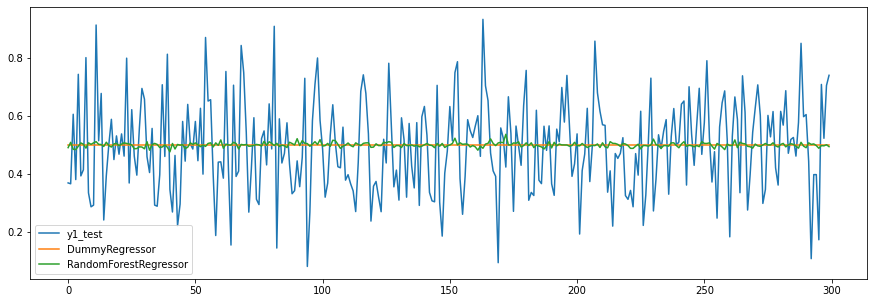

In [ ]:
# график сравнения случайного леса и базовой модели 
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y1_test, label = 'y1_test')
axes.plot(y1_pred_Dummy, label = 'DummyRegressor')
axes.plot(y1_pred_forest, label = 'RandomForestRegressor')
axes.legend()
plt.show()

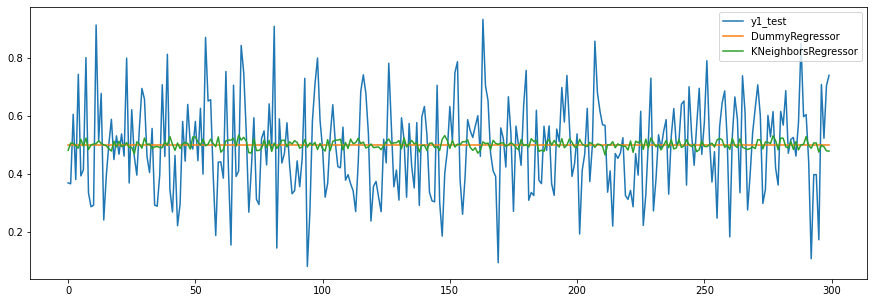

In [ ]:
# график сравнения к-ближайщих соседей и базовой модели 
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y1_test, label = 'y1_test')
axes.plot(y1_pred_Dummy, label = 'DummyRegressor')
axes.plot(y1_pred_knr, label = 'KNeighborsRegressor')
axes.legend()
plt.show()

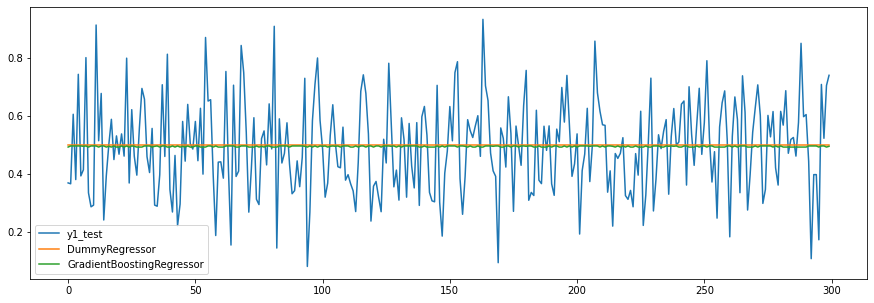

In [ ]:
# график сравнения стохастического градиентного спуска и базовой модели 
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y1_test, label = 'y1_test')
axes.plot(y1_pred_Dummy, label = 'DummyRegressor')
axes.plot(y1_pred_GBR, label = 'GradientBoostingRegressor')
axes.legend()
plt.show()

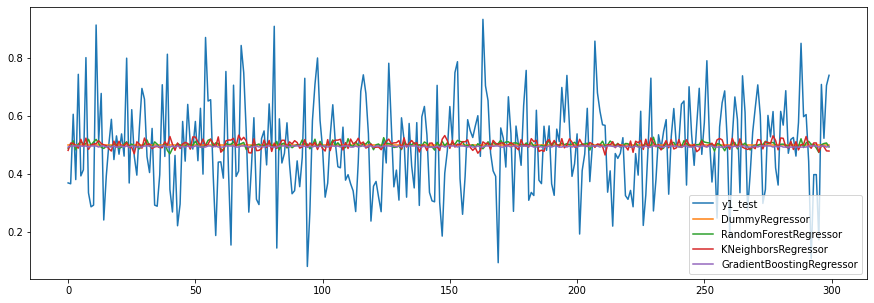

In [ ]:
# график сравнения всех моделей 
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y1_test, label = 'y1_test')
axes.plot(y1_pred_Dummy, label = 'DummyRegressor')
axes.plot(y1_pred_forest, label = 'RandomForestRegressor')
axes.plot(y1_pred_knr, label = 'KNeighborsRegressor')
axes.plot(y1_pred_GBR, label = 'GradientBoostingRegressor')
axes.legend()
plt.show()

In [51]:
# сравнение прогнозов
compare1 = calculate_metrics('DummyRegressor', y1_test, y1_pred_Dummy)
compare1 = compare1.append(calculate_metrics('RandomForestRegressor', y1_test, y1_pred_forest))
compare1 = compare1.append(calculate_metrics('KNeighborsRegressor', y1_test, y1_pred_knr))
compare1 = compare1.append(calculate_metrics('GradientBoostingRegressor', y1_test, y1_pred_GBR))
compare1.style.highlight_max(axis=0, color='#7FB9D5')


<ipython-input-51-44aba48ffb2e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(calculate_metrics('RandomForestRegressor', y1_test, y1_pred_forest))
<ipython-input-51-44aba48ffb2e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(calculate_metrics('KNeighborsRegressor', y1_test, y1_pred_knr))
<ipython-input-51-44aba48ffb2e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(calculate_metrics('GradientBoostingRegressor', y1_test, y1_pred_GBR))


Из сводной таблицы видно, что модель RandomForestRegressor имеет наибольшее значение коэффициента детерминации R2 , но так как это значение все равно близкое к нулю это значит, что модель объясняет небольшую часть изменчивости данных. Также эта модель имеет наименьшее значение RMSE  и MAE, что указывает на то, что она лучше других предсказывает данные.

**2. Модель для прогнозирования прочности при растяжении**

In [ ]:
#выводим результативность моделей с гиперпараметрами по умолчанию
default_models2 = {'LinearRegression': LinearRegression(),
                   'GradientBoostingRegressor': GradientBoostingRegressor (random_state=42),
                   'DummyRegressor': DummyRegressor(strategy='mean'),
                   'Lasso': Lasso(),
                   'SVR': SVR(),
                   'KneighborsRegressor': KNeighborsRegressor(),
                   'DecisionTreeRegressor': DecisionTreeRegressor (random_state=42),
                   'RandomForestRegressor': RandomForestRegressor (random_state=42)}
metric2 = models_on(default_models2, X2_train, y2_train)
metric2 = metric2.sort_values(by="R2", ascending=False)

def highlight_max_row(row):
    return ['background-color: #7B7BBC' if row['R2'] == metric2['R2'].max() else '' for _ in row]
metric2.style.apply(highlight_max_row, axis=1)

Ни одна из моделей не показала хороших результатов по коэффициенту детерминации R2 для прогноза прочности при растяжении
Результаты оказались хуже результатов прогноза упругости при растяжении.   
Попробуем подобрать гиперпараметры

In [ ]:
#1 поиск гиперпараметров для DummyRegressor
best_models2={}
params1 = [
    {'strategy': ['mean', 'median', 'quantile', 'constant'],
     'quantile': [0.25, 0.5, 0.75],
     'constant': [0]}
]

# Выполняем решетчатый поиск на модели DummyRegressor
search, bestmodel = grid_search(DummyRegressor(), params1,X2_train, y2_train)

# Сохраняем лучшую модель в словарь
best_models2[str(bestmodel)] = bestmodel

# Выводим результаты поиска для лучшей модели
search[search['rank']==1]

params       MAE  rank
0  {'constant': 0, 'quantile': 0.25, 'strategy': 'mean'}  0.132093     1
4   {'constant': 0, 'quantile': 0.5, 'strategy': 'mean'}  0.132093     1
8  {'constant': 0, 'quantile': 0.75, 'strategy': 'mean'}  0.132093     1

In [ ]:
#	{'constant': 0, 'quantile': 0.25, 'strategy': 'mean'}	0.132093	1
#	{'constant': 0, 'quantile': 0.5, 'strategy': 'mean'}	0.132093	1
#	{'constant': 0, 'quantile': 0.75, 'strategy': 'mean'}	0.132093	1

In [ ]:
#2 поиск гиперпараметров для Lasso
params1 = [
    {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.2, 0.5, 1, 10]}
]
search, bestmodel = grid_search(Lasso(), params1,X2_train, y2_train)
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params       MAE  rank
2  {'alpha': 0.005}  0.132093     1
3   {'alpha': 0.01}  0.132093     1
4    {'alpha': 0.2}  0.132093     1
5    {'alpha': 0.5}  0.132093     1
6      {'alpha': 1}  0.132093     1
7     {'alpha': 10}  0.132093     1

In [ ]:
#{'alpha': 0.005}	0.132093	1
#	{'alpha': 0.01}	0.132093	1
#{'alpha': 0.2}	0.132093	1
#	{'alpha': 0.5}	0.132093	1
#	{'alpha': 1}	0.132093	1
#	{'alpha': 10}	0.132093	1

In [ ]:
#3 поиск гиперпараметров для LinearRegression

params1 = { 'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [-1, 1, 2] }


search, bestmodel = grid_search(LinearRegression(), params1,X2_train, y2_train)  
best_models2[str(bestmodel)] = bestmodel
search[search['rank']==1]

params      MAE  rank
0   {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}  0.13311     1
1    {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}  0.13311     1
2    {'copy_X': True, 'fit_intercept': True, 'n_jobs': 2}  0.13311     1
6  {'copy_X': False, 'fit_intercept': True, 'n_jobs': -1}  0.13311     1
7   {'copy_X': False, 'fit_intercept': True, 'n_jobs': 1}  0.13311     1
8   {'copy_X': False, 'fit_intercept': True, 'n_jobs': 2}  0.13311     1

In [ ]:
#	{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}	0.13311	1
#	{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}	0.13311	1
#	{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2}	0.13311	1
#	{'copy_X': False, 'fit_intercept': True, 'n_jobs': -1}	0.13311	1
#	{'copy_X': False, 'fit_intercept': True, 'n_jobs': 1}	0.13311	1
#	{'copy_X': False, 'fit_intercept': True, 'n_jobs': 2}	0.13311	1

In [ ]:
#4  поиск гиперпараметров для RandomForestRegressor
params1 = {'n_estimators': range(10, 200, 10), 'max_depth': range(1, 20)}
search, bestmodel6 = grid_search(RandomForestRegressor(), params1,X2_train, y2_train)
best_models2[str(bestmodel6)] = bestmodel6
search[search['rank']==1]

#тест y1_train.values.ravel())

params       MAE  rank
0  {'max_depth': 1, 'n_estimators': 10}  0.131611     1

In [ ]:
	#{'max_depth': 2, 'n_estimators': 30}	0.132027	1

In [ ]:
# Сохранение переменной bestmodel в файл
with open('bestmodel6.pickle', 'wb') as RandomForestRegressor2:
    pickle.dump(bestmodel6, RandomForestRegressor2)

In [ ]:
#5 поиск гиперпараметров для GBR
params1 = {'random_state': [42],
           'loss': ['squares_error', 'absolute_error'],
           'n_estimators': [10,50,75,100],
           'max_depth': [1,2,3],
           'min_samples_split': [2,5,10],
           'learning_rate': [0.01, 0.1, 0.9]
           }
search, bestmodel7 = grid_search(GradientBoostingRegressor(), params1,X2_train, y2_train)
best_models2[str(bestmodel7)] = bestmodel7
search[search['rank']==1]

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_p

params  \
48  {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 2, 'min_samples_split': 2, 'n_est...   
52  {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 2, 'min_samples_split': 5, 'n_est...   
56  {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 2, 'min_samples_split': 10, 'n_es...   

         MAE  rank  
48  0.132173     1  
52  0.132173     1  
56  0.132173     1

In [ ]:
#	{'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 2, 'min_samples_split': 2, 'n_est...	0.132173	1
#	{'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 2, 'min_samples_split': 5, 'n_est...	0.132173	1
#	{'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 2, 'min_samples_split': 10, 'n_es...	0.132173	1

In [ ]:
# Сохранение переменной bestmodel в файл
with open('bestmodel7.pickle', 'wb') as GBR2:
    pickle.dump(bestmodel7, GBR2)

In [ ]:
#6  поиск гиперпараметров для KneighborsRegressor
params1 = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
search, bestmodel8 = grid_search(KNeighborsRegressor(), params1,X2_train, y2_train)
best_models2[str(bestmodel8)] = bestmodel8
search[search['rank']==1]


params  \
276        {'algorithm': 'auto', 'n_neighbors': 277, 'weights': 'uniform'}   
576   {'algorithm': 'ball_tree', 'n_neighbors': 277, 'weights': 'uniform'}   
876     {'algorithm': 'kd_tree', 'n_neighbors': 277, 'weights': 'uniform'}   
1176      {'algorithm': 'brute', 'n_neighbors': 277, 'weights': 'uniform'}   

           MAE  rank  
276   0.131886     1  
576   0.131886     1  
876   0.131886     1  
1176  0.131886     1

In [ ]:


#	{'algorithm': 'auto', 'n_neighbors': 277, 'weights': 'uniform'}	0.131886	1
#{'algorithm': 'ball_tree', 'n_neighbors': 277, 'weights': 'uniform'}	0.131886	1
#{'algorithm': 'kd_tree', 'n_neighbors': 277, 'weights': 'uniform'}	0.131886	1
#	{'algorithm': 'brute', 'n_neighbors': 277, 'weights': 'uniform'}	0.131886	1

In [ ]:
# Сохранение переменной bestmodel в файл
with open('bestmodel8.pickle', 'wb') as KneighborsRegressor2:
    pickle.dump(bestmodel8, KneighborsRegressor2)

In [ ]:
#7 поиск гиперпараметров для SVR
params1 = [
    {'kernel': ['linear'],
     'C': [0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.1]
     },
     {'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02, 0.05, 0.1],
      'degree' : [1,5]
      },
      {'kernel':['rbf'],
       'C': [0.001, 0.02, 0.03, 0.04, 0.5]
       },
       {'kernel':['sigmoid'],
        'C': [0.001, 0.01, 0.02, 0.03, 0.04, 0.5]
        }
]
search, bestmodel9 = grid_search(SVR(), params1,X2_train, y2_train)
best_models2[str(bestmodel9)] = bestmodel9
search[search['rank']==1]

params       MAE  rank
0  {'C': 0.001, 'kernel': 'linear'}  0.132011     1

In [ ]:
#{'C': 0.001, 'kernel': 'linear'}	0.132011	1

In [ ]:
# Сохранение переменной bestmodel в файл
with open('bestmodel9.pickle', 'wb') as SVR2:
    pickle.dump(bestmodel9, SVR2)

In [ ]:
#8 поиск гиперпараметров для DecisionTreeRegressor
params1 = {'max_depth': range(1, 20), 'min_samples_split': range(2, 10)}

search, bestmodel10 = grid_search(DecisionTreeRegressor(), params1,X2_train, y2_train)
best_models2[str(bestmodel10)] = bestmodel10
search[search['rank']==1]

params       MAE  rank
0  {'max_depth': 1, 'min_samples_split': 2}  0.132716     1
1  {'max_depth': 1, 'min_samples_split': 3}  0.132716     1
2  {'max_depth': 1, 'min_samples_split': 4}  0.132716     1
3  {'max_depth': 1, 'min_samples_split': 5}  0.132716     1
4  {'max_depth': 1, 'min_samples_split': 6}  0.132716     1
5  {'max_depth': 1, 'min_samples_split': 7}  0.132716     1
6  {'max_depth': 1, 'min_samples_split': 8}  0.132716     1
7  {'max_depth': 1, 'min_samples_split': 9}  0.132716     1

In [ ]:
#	{'max_depth': 1, 'min_samples_split': 2}	0.132716	1
#	{'max_depth': 1, 'min_samples_split': 3}	0.132716	1
#	{'max_depth': 1, 'min_samples_split': 4}	0.132716	1
#	{'max_depth': 1, 'min_samples_split': 5}	0.132716	1
#	{'max_depth': 1, 'min_samples_split': 6}	0.132716	1
#	{'max_depth': 1, 'min_samples_split': 7}	0.132716	1
#	{'max_depth': 1, 'min_samples_split': 8}	0.132716	1
#	{'max_depth': 1, 'min_samples_split': 9}	0.132716	1

In [ ]:
# Сохранение переменной bestmodel в файл
with open('bestmodel10.pickle', 'wb') as DecisionTreeRegressor2:
    pickle.dump(bestmodel10, DecisionTreeRegressor2)

In [ ]:
#сводим модели с подобраными гиперпараметрами
metric2_best = models_on(best_models2, X2_train, y2_train)
metric2_best.style.apply(highlight_max_row, axis=1)

In [ ]:
metric2_best.to_excel('Метрики2.xlsx')

Качество моделей для для прогнозирования прочности при растяжении хуже чем для прогноза для прогнозирования модуля упругости при растяжении. Воспользуемся такими же регрессорами как и для первого прогноза. Изменим только Градиентный спуск на линейную регрессию.

In [ ]:
#{'algorithm': 'auto', 'n_neighbors': 277, 'weights': 'uniform'}	0

In [84]:
knr = KNeighborsRegressor() 
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
model1 = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
model1.fit(X2_train, y2_train)

y2_pred_knr = model1.predict(X2_test)

In [ ]:
knr_pr = model1.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X2_test, y2_test).round(3)}')

R2-score KNR для прочности при растяжении: -0.011


In [79]:
#спрогнозируем с помощью DummyRegressor
model2_Dummy = DummyRegressor(strategy='mean', constant=0, quantile=0.25)
model2_Dummy.fit(X2_train, y2_train)
y2_pred_Dummy = model1_Dummy.predict(X2_test)

In [80]:
#спрогнозируем с помощью RandomForestRegressor
model2_forest = RandomForestRegressor(max_depth=2, n_estimators=30)
model2_forest.fit(X2_train, y2_train)
y2_pred_forest = model2_forest.predict(X2_test)

In [81]:
# Создаем объект LinearRegression с заданными гиперпараметрами
linear_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1)
linear_model.fit(X2_train, y2_train)
y2_pred_linear = linear_model.predict(X2_test)

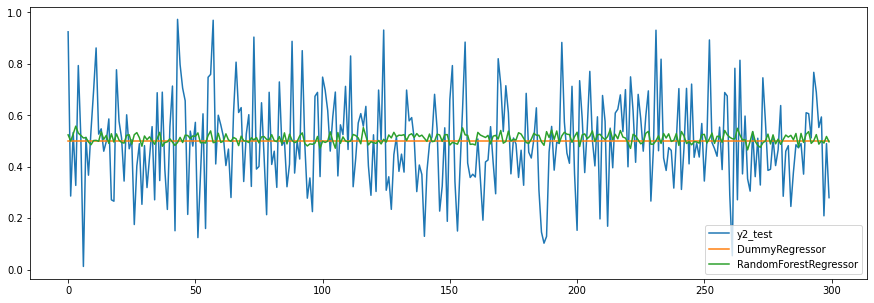

In [82]:
#сравнение случайного леса и базовой модели
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y2_test, label = 'y2_test')
axes.plot(y2_pred_Dummy, label = 'DummyRegressor')
axes.plot(y2_pred_forest, label = 'RandomForestRegressor')
axes.legend()
plt.show()

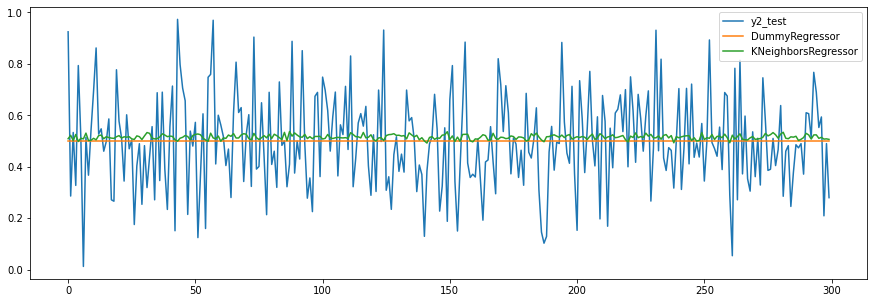

In [ ]:
#сравнение к-ближайщих соседей и базовой модели
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y2_test, label = 'y2_test')
axes.plot(y2_pred_Dummy, label = 'DummyRegressor')
axes.plot(y2_pred_knr, label = 'KNeighborsRegressor')
axes.legend()
plt.show()

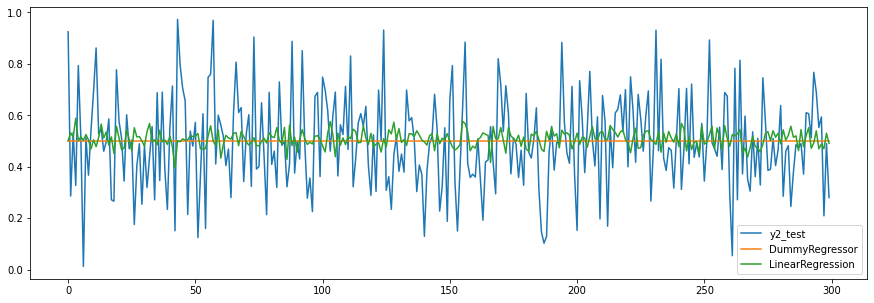

In [ ]:
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y2_test, label = 'y2_test')
axes.plot(y2_pred_Dummy, label = 'DummyRegressor')
axes.plot(y2_pred_linear, label = 'LinearRegression')
axes.legend()
plt.show()

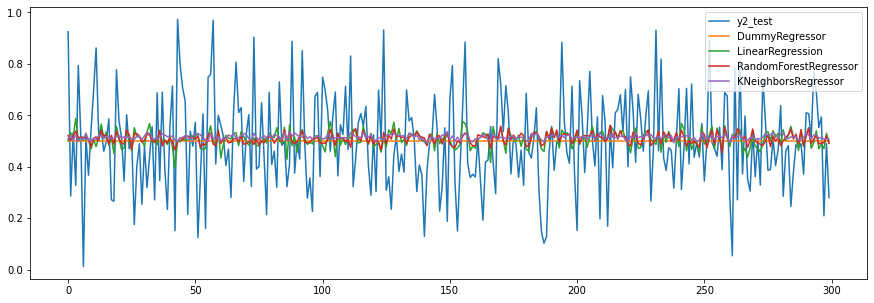

In [ ]:
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y2_test, label = 'y2_test')
axes.plot(y2_pred_Dummy, label = 'DummyRegressor')
axes.plot(y2_pred_linear, label = 'LinearRegression')
axes.plot(y2_pred_forest, label = 'RandomForestRegressor')
axes.plot(y2_pred_knr, label = 'KNeighborsRegressor')
axes.legend()
plt.show()

In [85]:
# сравнение прогнозов
compare1 = calculate_metrics('DummyRegressor', y2_test, y2_pred_Dummy)
compare1 = compare1.append(calculate_metrics('RandomForestRegressor', y2_test, y2_pred_forest))
compare1 = compare1.append(calculate_metrics('KNeighborsRegressor', y2_test, y2_pred_knr))
compare1 = compare1.append(calculate_metrics('LinearRegression', y2_test, y2_pred_linear))
compare1.style.highlight_max(axis=0, color='#7FB9D5')


<ipython-input-85-c171248efbdf>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(calculate_metrics('RandomForestRegressor', y2_test, y2_pred_forest))
<ipython-input-85-c171248efbdf>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(calculate_metrics('KNeighborsRegressor', y2_test, y2_pred_knr))
<ipython-input-85-c171248efbdf>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare1 = compare1.append(calculate_metrics('LinearRegression', y2_test, y2_pred_linear))


Для прогнозирования прочности при растяжении были использованы 4 модели: DummyRegressor, RandomForestRegressor, KNeighborsRegressor и LinearRegression. В соответствии с данными R2, RMSE, MAE и max_error, лучшей моделью является DummyRegressor. Однако, все модели имеют отрицательные значения R2, т.е. модели не могут объяснить вариацию в данных.

**3. Модели для прогнозирования cоотношение матрица-наполнитель. Нейронная сеть**

Выбираю Многослойный персептрон - это нейронная сеть, которая является реализацией многослойного персептрона для регрессии в библиотеке scikit-learn. Она может обрабатывать нелинейные зависимости между входными и выходными данными и работать с данными, которые не являются линейно разделимыми.

In [92]:
#спрогнозируем с помощью DummyRegressor, чтобы можно было сравнить результаты
model3_Dummy = DummyRegressor(strategy='mean', constant=0, quantile=0.25)
model3_Dummy.fit(X3_train, y3_train)
y3_pred_Dummy = model1_Dummy.predict(X3_test)

In [ ]:
#подбор гиперпараметров

In [ ]:
best_models3 = {}

In [ ]:
params1 = {'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}
search, bestmodel9 = grid_search(MLPRegressor(random_state=2), params1,X3_train, y3_train)
best_models3[str(bestmodel9)] = bestmodel9
search[search['rank']==1]

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

params  \
42  {'activation': 'logistic', 'hidden_layer_sizes': (16, 16, 8), 'learning_rate': 'constant', 'max_...   

         MAE  rank  
42  0.137898     1

In [ ]:
best_models3

{"MLPRegressor(activation='logistic', hidden_layer_sizes=(16, 16, 8),\n             max_iter=300, random_state=2, solver='sgd')": MLPRegressor(activation='logistic', hidden_layer_sizes=(16, 16, 8),
              max_iter=300, random_state=2, solver='sgd')}

In [93]:
model_mlpr = MLPRegressor(hidden_layer_sizes = (16, 16, 8),
                         activation = 'logistic',
                         solver = 'sgd',
                         max_iter = 300,
                         early_stopping = True,
                         validation_fraction=0.3,
                         verbose=True,
                         random_state=2,
                         learning_rate= 'constant')

In [94]:
model_mlpr.fit(X3_train, y3_train)

Iteration 1, loss = 0.26314921
Validation score: -16.896022
Iteration 2, loss = 0.24876754
Validation score: -15.468553
Iteration 3, loss = 0.22742018
Validation score: -13.746010
Iteration 4, loss = 0.20275555
Validation score: -11.921403
Iteration 5, loss = 0.17721061
Validation score: -10.132431
Iteration 6, loss = 0.15223879
Validation score: -8.466134
Iteration 7, loss = 0.12961784
Validation score: -6.967134
Iteration 8, loss = 0.10923248
Validation score: -5.660851
Iteration 9, loss = 0.09148393
Validation score: -4.546256
Iteration 10, loss = 0.07654978
Validation score: -3.612233
Iteration 11, loss = 0.06391744
Validation score: -2.843198
Iteration 12, loss = 0.05360085
Validation score: -2.216239
Iteration 13, loss = 0.04522313
Validation score: -1.712390
Iteration 14, loss = 0.03844323
Validation score: -1.312551
Iteration 15, loss = 0.03313491
Validation score: -0.998156
Iteration 16, loss = 0.02892904
Validation score: -0.754122
Iteration 17, loss = 0.02561563
Validation s

MLPRegressor(activation='logistic', early_stopping=True,
             hidden_layer_sizes=(16, 16, 8), max_iter=300, random_state=2,
             solver='sgd', validation_fraction=0.3, verbose=True)

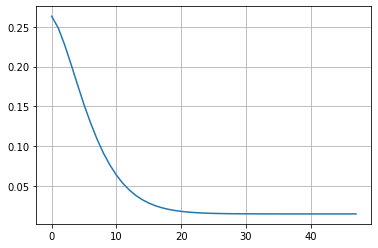

In [95]:
plt.plot(model_mlpr.loss_curve_)
plt.grid(True)
plt.show()

In [96]:
#делаем прогноз при помощи MLPRegressor
y3_pred_model_mlpr = model_mlpr.predict(X3_test)

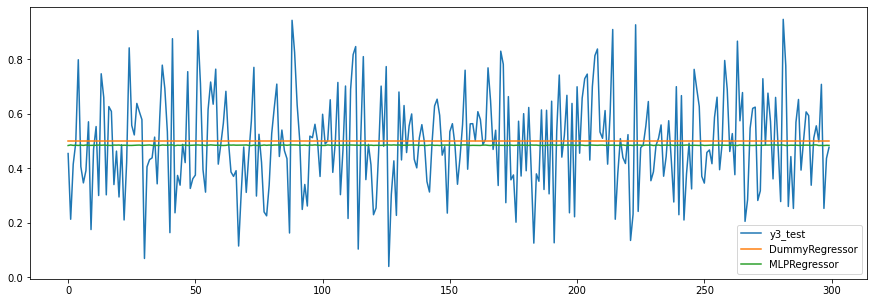

In [ ]:
#Выведем результаты на график
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y3_test, label = 'y3_test')
axes.plot(y3_pred_Dummy, label = 'DummyRegressor')
axes.plot(y3_pred_model_mlpr, label = 'MLPRegressor')
axes.legend()
plt.show()


In [98]:
compare3 = calculate_metrics('DummyRegressor', y3_test, y3_pred_Dummy)
compare3 = compare3.append(calculate_metrics('MLPRegressor', y3_test, y3_pred_model_mlpr))
compare3
compare3.style.highlight_max(axis=0, color='#7FB9D5')

<ipython-input-98-aa9b9c0ced80>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3 = compare3.append(calculate_metrics('MLPRegressor', y3_test, y3_pred_model_mlpr))


MLPRegressor имеет отрицательное значение R2 это означает, что модель работает хуже, чем простая константная модель. Это может быть связано с тем, что модель не учитывает некоторые важные факторы или что данные не подходят для данной модели. 

**Sequential**

Пробую обучить Sequential - это модель нейронной сети, которая позволяет создавать модели с помощью последовательности слоев, где каждый слой имеет один вход и один выход тензора. Это удобно для создания простых моделей.


In [99]:
#Строим нейронную сеть c помощью библиотеки Tensorflow
model_Sequential = tf.keras.Sequential([
    keras.layers.Input(shape=(12,), name='in'),
    keras.layers.Dense(units=24, activation='relu', name='dense_1'),
    keras.layers.Dense(units=24, activation='relu', name='dense_2'),
    keras.layers.Dense(units=24, activation='relu', name='dense_3'),
    keras.layers.Dense(units=36, activation='relu', name='dense_4'),
    keras.layers.Dense(units=36, activation='relu', name='dense_5'),
    keras.layers.Dense(units=36, activation='relu', name='dense_6'),
    keras.layers.Dense(units=36, activation='relu', name='dense_7'),
    keras.layers.Dense(units=24, activation='relu', name='dense_8'),
    keras.layers.Dense(units=48, activation='relu', name='dense_9'),
    keras.layers.Dense(units=24, activation='relu', name='dense_10'),
    keras.layers.Dense(units=1, name='out')

])

In [100]:
#компилируем нейронную сеть
model_Sequential.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanAbsoluteError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [101]:
model_Sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 36)                900       
                                                                 
 dense_5 (Dense)             (None, 36)                1332      
                                                                 
 dense_6 (Dense)             (None, 36)                1332      
                                                                 
 dense_7 (Dense)             (None, 36)                1

In [103]:
#обучение нейросети
%time
history = model_Sequential.fit(
    X3_train,
    y3_train,
    epochs=100,
    validation_split=0.3,
    verbose=1
)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 13.1 µs
Epoch 1/100
16/16 [==============================] - 2s 21ms/step - loss: 0.4289 - root_mean_squared_error: 0.4648 - val_loss: 0.2738 - val_root_mean_squared_error: 0.3172
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1788 - root_mean_squared_error: 0.2227 - val_loss: 0.1423 - val_root_mean_squared_error: 0.1749
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1445 - root_mean_squared_error: 0.1802 - val_loss: 0.1419 - val_root_mean_squared_error: 0.1743
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1394 - root_mean_squared_error: 0.1759 - val_loss: 0.1410 - val_root_mean_squared_error: 0.1733
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1399 - root_mean_squared_error: 0.1753 - val_loss: 0.1413 - val_root_mean_squared_error: 0.1737
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1405 

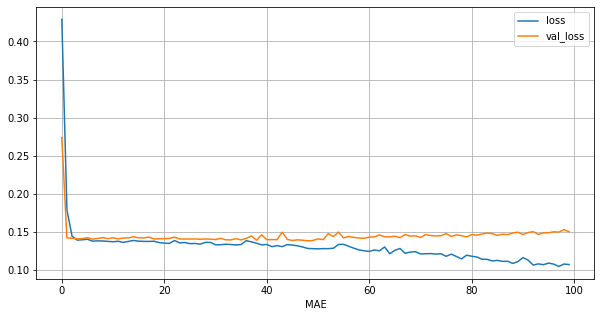

In [104]:
#построим график для ошибки MAE
fig, axes = plt.subplots(figsize=(10,5))
axes.plot(history.history['loss'], label='loss')
axes.plot(history.history['val_loss'], label='val_loss')
axes.set_xlabel('Epoch')
axes.set_xlabel('MAE')
axes.legend()
axes.grid(True)
plt.show()


In [105]:
#проверяем точность нейросети на тестовой выборке
model_Sequential.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1646 - root_mean_squared_error: 0.2013


[0.1646081954240799, 0.2012973129749298]

In [106]:
#делаем прогноз на тестовой выборке
y3_pred_Sequential = model_Sequential.predict(X3_test)

10/10 [==============================] - 0s 2ms/step


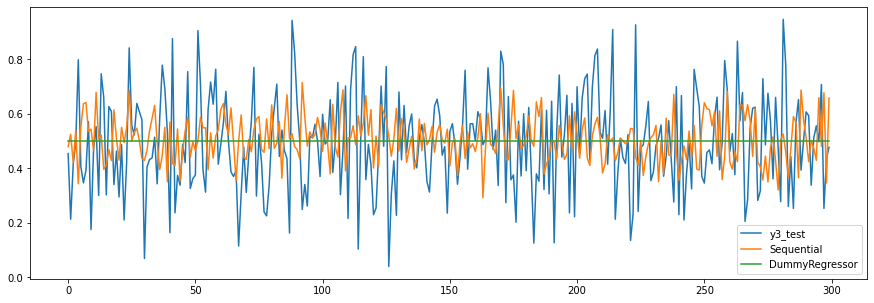

In [107]:
#Выведем результаты на график
fig, axes = plt.subplots(figsize =(15, 5))
axes.plot(y3_test, label = 'y3_test')
axes.plot(y3_pred_Sequential, label = 'Sequential')
axes.plot(y3_pred_Dummy, label = 'DummyRegressor')
axes.legend()
plt.show()


Попробуем добавить остановку обучения, чтобы избежать переобучение

In [108]:
#Строим нейронную сеть c помощью библиотеки Tensorflow
model_EarlyStop = tf.keras.Sequential([
    keras.layers.Input(shape=(12,), name='in'),
    keras.layers.Dense(units=24, activation='relu', name='dense_1'),
    keras.layers.Dense(units=24, activation='relu', name='dense_2'),
    keras.layers.Dense(units=24, activation='relu', name='dense_3'),
    keras.layers.Dense(units=36, activation='relu', name='dense_4'),
    keras.layers.Dense(units=36, activation='relu', name='dense_5'),
    keras.layers.Dense(units=36, activation='relu', name='dense_6'),
    keras.layers.Dense(units=36, activation='relu', name='dense_7'),
    keras.layers.Dense(units=24, activation='relu', name='dense_8'),
    keras.layers.Dense(units=48, activation='relu', name='dense_9'),
    keras.layers.Dense(units=24, activation='relu', name='dense_10'),
    keras.layers.Dense(units=1, name='out')

])

In [109]:
#компилируем нейронную сеть
model_EarlyStop.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanAbsoluteError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [110]:
model_EarlyStop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 36)                900       
                                                                 
 dense_5 (Dense)             (None, 36)                1332      
                                                                 
 dense_6 (Dense)             (None, 36)                1332      
                                                                 
 dense_7 (Dense)             (None, 36)               

In [111]:
#обучение нейросети, остановка обучения при отсутствии улучшения валидационной ошибки в течение 3 эпох
history = model_EarlyStop.fit(
    X3_train,
    y3_train,
    epochs=100,
    validation_split=0.3,
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/100
16/16 [==============================] - 3s 28ms/step - loss: 0.3411 - root_mean_squared_error: 0.3914 - val_loss: 0.1650 - val_root_mean_squared_error: 0.2066
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1698 - root_mean_squared_error: 0.2106 - val_loss: 0.1678 - val_root_mean_squared_error: 0.2080
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1476 - root_mean_squared_error: 0.1870 - val_loss: 0.1476 - val_root_mean_squared_error: 0.1844
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1424 - root_mean_squared_error: 0.1769 - val_loss: 0.1437 - val_root_mean_squared_error: 0.1783
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1400 - root_mean_squared_error: 0.1757 - val_loss: 0.1443 - val_root_mean_squared_error: 0.1789
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1377 - root_mean_squared_error: 0.1735 - val_loss: 0.1420 - val_root_

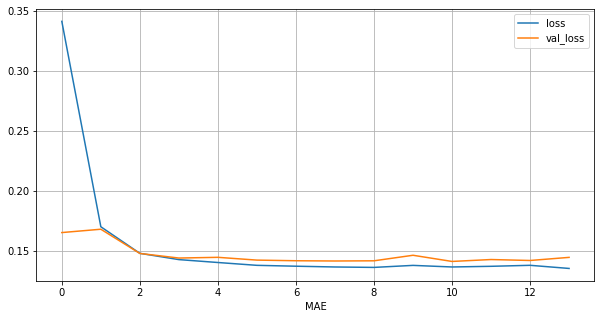

In [114]:
#построим график для ошибки MAE
fig, axes = plt.subplots(figsize=(10,5))
axes.plot(history.history['loss'], label='loss')
axes.plot(history.history['val_loss'], label='val_loss')
axes.set_xlabel('Epoch')
axes.set_xlabel('MAE')
axes.legend()
axes.grid(True)
plt.show()


In [115]:
#проверяю на тестовой выборке
model_EarlyStop.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1490 - root_mean_squared_error: 0.1863


[0.1489529311656952, 0.18632712960243225]

In [116]:
#делаем прогноз
y3_pred_EarlyStop = model_EarlyStop.predict(X3_test)

10/10 [==============================] - 0s 4ms/step


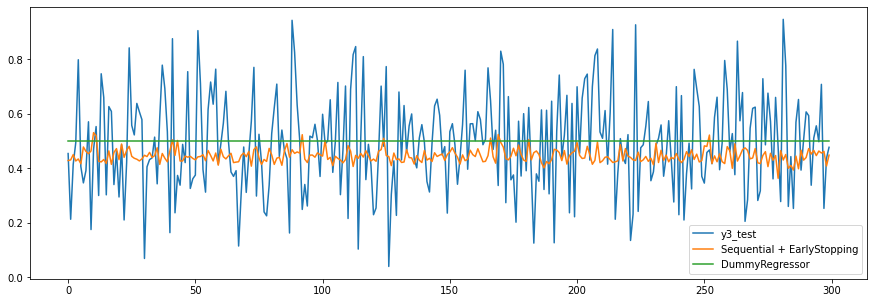

In [117]:
#Выведем результаты на график
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y3_test, label = 'y3_test')
axes.plot(y3_pred_EarlyStop, label = 'Sequential + EarlyStopping')
axes.plot(y3_pred_Dummy, label = 'DummyRegressor')
axes.legend()
plt.show()

In [118]:
#пробуем добавить в модель Droupout слои
#Строим нейронную сеть c помощью библиотеки Tensorflow
model_Droupout = tf.keras.Sequential([
    keras.layers.Input(shape=(12,), name='in'),
    keras.layers.Dense(units=24, activation='relu', name='dense_1'),
    #keras.layers.Dropout(0.5, name='dr_1'),
    keras.layers.Dense(units=24, activation='relu', name='dense_2'),
    keras.layers.Dense(units=24, activation='relu', name='dense_3'),
    #keras.layers.Dropout(0.5, name='dr_2'),
    keras.layers.Dense(units=36, activation='relu', name='dense_4'),
    keras.layers.Dense(units=36, activation='relu', name='dense_5'),
    #keras.layers.Dropout(0.5, name='dr_3'),
    keras.layers.Dense(units=36, activation='relu', name='dense_6'),
    keras.layers.Dense(units=36, activation='relu', name='dense_7'),
    #keras.layers.Dropout(0.5, name='dr_4'),
    keras.layers.Dense(units=24, activation='relu', name='dense_8'),
    keras.layers.Dense(units=48, activation='relu', name='dense_9'),
    #keras.layers.Dropout(0.5, name='dr_5'),
    keras.layers.Dense(units=24, activation='relu', name='dense_10'),
    keras.layers.Dense(units=1, name='out')

])

In [119]:
#компилируем нейронную сеть
model_Droupout.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanAbsoluteError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
#обучение нейросети
history = model_Droupout.fit(
    X3_train,
    y3_train,
    epochs=100,
    validation_split=0.3)

Epoch 1/100
16/16 [==============================] - 2s 20ms/step - loss: 0.2773 - root_mean_squared_error: 0.3334 - val_loss: 0.1578 - val_root_mean_squared_error: 0.1976
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1495 - root_mean_squared_error: 0.1897 - val_loss: 0.1462 - val_root_mean_squared_error: 0.1803
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1429 - root_mean_squared_error: 0.1805 - val_loss: 0.1445 - val_root_mean_squared_error: 0.1786
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1422 - root_mean_squared_error: 0.1793 - val_loss: 0.1455 - val_root_mean_squared_error: 0.1790
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1404 - root_mean_squared_error: 0.1766 - val_loss: 0.1433 - val_root_mean_squared_error: 0.1765
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1421 - root_mean_squared_error: 0.1780 - val_loss: 0.1438 - val_root_

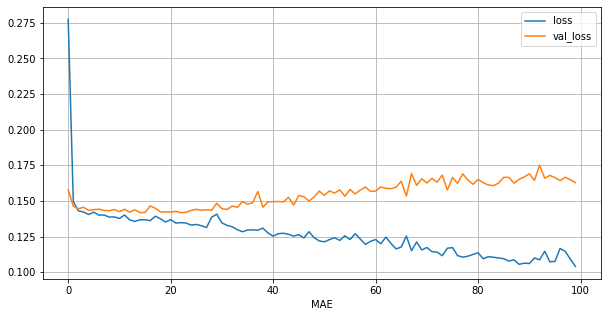

In [ ]:
#построим график для ошибки MAE
fig, axes = plt.subplots(figsize=(10,5))
axes.plot(history.history['loss'], label='loss')
axes.plot(history.history['val_loss'], label='val_loss')
axes.set_xlabel('Epoch')
axes.set_xlabel('MAE')
axes.legend()
axes.grid(True)
plt.show()


In [ ]:
model_Droupout.evaluate(X3_test, y3_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.1625 - root_mean_squared_error: 0.1994


[0.1625373512506485, 0.1993810087442398]

In [120]:
#делаем прогноз
y3_pred_Droupout = model_Droupout.predict(X3_test)

10/10 [==============================] - 0s 2ms/step


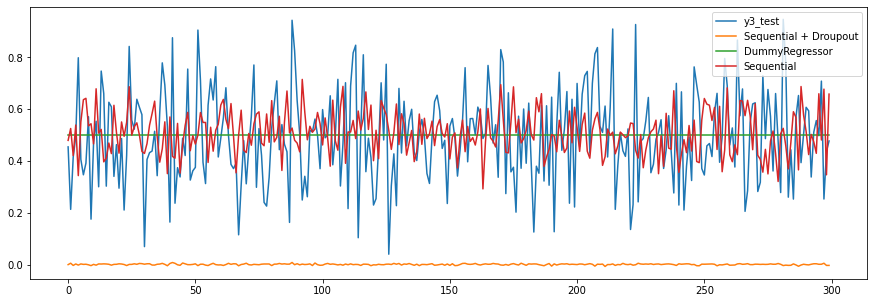

In [124]:
#Выведем результаты на график
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y3_test, label = 'y3_test')
axes.plot(y3_pred_Droupout, label = 'Sequential + Droupout')
axes.plot(y3_pred_Dummy, label = 'DummyRegressor')
axes.plot(y3_pred_Sequential, label = 'Sequential')
axes.legend()
plt.show()

In [ ]:
#Выведем результаты на график
fig, axes = plt.subplots(figsize =( 15, 5))
axes.plot(y3_test, label = 'y3_test')
axes.plot(y3_pred_Droupout, label = 'Sequential + Droupout')
axes.plot(y3_pred_EarlyStop, label = 'Sequential + EarlyStopping')
axes.plot(y3_pred_Dummy, label = 'DummyRegressor')
axes.legend()
plt.show()

In [122]:
#Сравниваю пронозы
compare3 = calculate_metrics('DummyRegressor', y3_test, y3_pred_Dummy)
compare3 = compare3.append(calculate_metrics('Sequentail', y3_test, y3_pred_Sequential))
compare3 = compare3.append(calculate_metrics('Sequential + EarlyStopping', y3_test, y3_pred_EarlyStop))
compare3 = compare3.append(calculate_metrics('Sequential + Droupout', y3_test, y3_pred_Droupout))

compare3.style.highlight_max(axis=0, color='#7FB9D5')

<ipython-input-122-9ca051bbc88f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3 = compare3.append(calculate_metrics('Sequentail', y3_test, y3_pred_Sequential))
<ipython-input-122-9ca051bbc88f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3 = compare3.append(calculate_metrics('Sequential + EarlyStopping', y3_test, y3_pred_EarlyStop))
<ipython-input-122-9ca051bbc88f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare3 = compare3.append(calculate_metrics('Sequential + Droupout', y3_test, y3_pred_Droupout))


Модель Sequential + EarlyStopping имеет наибольшее значение R2, а также наименьшие значения RMSE, MAE и max_error. Это указывает на то, что модель Sequential + EarlyStopping лучше обобщает данные по сравнению с другими моделями.

Приложение

In [52]:
#лучшая модель 
model1_forest

RandomForestRegressor(max_depth=1, n_estimators=30)

In [53]:
#сохранение лучшей модели 
from joblib import dump, load
dump(model1_forest, 'filename.joblib')

['filename.joblib']

In [54]:
model_l = load('filename.joblib') 

In [73]:
# сохраняем скейлеры
minmax_y = MinMaxScaler()
minmax_x = MinMaxScaler()
minmax_y.fit(df[y_elasticity])
minmax_x.fit(df[X_elasticity])
dump(minmax_y, 'minmax_y.joblib')
dump(minmax_x, 'minmax_x.joblib')

['minmax_x.joblib']

In [75]:
#Входы и выходы для моделей

minmax_y = MinMaxScaler()  
y_label = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
minmax_y.fit(df[y_label])
minmax_x.fit(df.drop(y_label, axis = 1))

# Сохраним масштабаторы для x и y
dump(minmax_y, 'minmax_y.joblin')
dump(minmax_x, 'minmax_x.joblin')



['minmax_x.joblin']

In [65]:
y_label = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
y = df[y_label]
X = df.drop(y_label, axis = 1)
y.shape,X.shape

((1000, 2), (1000, 11))

In [78]:
def input_variable():

  x1 = float(input('Введите значение переменной Соотношение матрица-наполнитель: '))
  x2 = float(input('Введите значение переменной Плотность: '))
  x3 = float(input('Введите значение переменной Модуль упругости: '))
  x4 = float(input('Введите значение переменной Количество отвердителя: '))
  x5 = float(input('Введите значение переменной Содержание эпоксидных групп: '))
  x6 = float(input('Введите значение переменной Температура вспышки: '))
  x7 = float(input('Введите значение переменной Поверхностная плотность: '))
  x77 = float(input('Введите значение переменной Прочность при растяжении, МПа: ')) =
  x8 = float(input('Введите значение переменной Потребление смолы: '))
  x9 = float(input('Введите значение переменной Угол нашивки: '))
  x10 = float(input('Введите значение переменной Шаг нашивки: '))
  x11 = float(input('Введите значение переменной Плотность нашивки: '))
  return x1,x2,x3,x4,x5,x6,x7,x77,x8,x9,x10,x11

def input_proc(X):
  print('вызов модели')
  model_l = load('filename.joblib') 
  res = model_l.predict(X)
  return res 

def app_model():
  scaler_x = load('minmax_x.joblib')
  scaler_y = load('minmax_y.joblib') 
  
  print('Приложение прогнозирует значения модулей упругости при растяжения')
  for i in range(110):
    try:
      print('введите 1 для прогноза, 2 для выхода')
      check = input()
      
      if check == '1':
        print('Введите данные')
        X = input_variable()
        X = scaler_x.transform(np.array(X).reshape(1,-1))
        print(['Модуль упругости при растяжении, ГПа'])
        print(scaler_y.inverse_transform(input_proc(X).reshape(1, -1)))


      elif check == '2':
        break
      else:
        print('Повторите выбор')
    except Exception as e:
      print('Неверные данные. Повторите операцию')
      print(e)
app_model()

Приложение прогнозирует значения модулей упругости при растяжения
введите 1 для прогноза, 2 для выхода
1
Введите данные
Введите значение переменной Соотношение матрица-наполнитель: 23
Введите значение переменной Плотность: 34
Введите значение переменной Модуль упругости: 212
Введите значение переменной Количество отвердителя: 345
Введите значение переменной Содержание эпоксидных групп: 345
Введите значение переменной Температура вспышки: 234
Введите значение переменной Поверхностная плотность: 567
Введите значение переменной Прочность при растяжении, МПа: 345
Введите значение переменной Потребление смолы: 234
Введите значение переменной Угол нашивки: 453
Введите значение переменной Шаг нашивки: 453
Введите значение переменной Плотность нашивки: 234


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


['Модуль упругости при растяжении, ГПа']
вызов модели
[[0.49884585]]
введите 1 для прогноза, 2 для выхода


KeyboardInterrupt: ignored